<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>



- This study delves into the demand for bicycle rentals among residents, covering the period from January  2015 to January 2017. By analyzing various factors that influence rental patterns, including temporal, meteorological, and social variables, this research aims to uncover nuanced insights into when and why residents opt for bicycle rentals. The findings are expected to guide rental companies in optimizing their services to better meet consumer needs. The study leverages a comprehensive dataset, incorporating diverse elements such as day type, weather conditions, and seasonal variations, to provide a holistic view of bicycle rental trends.

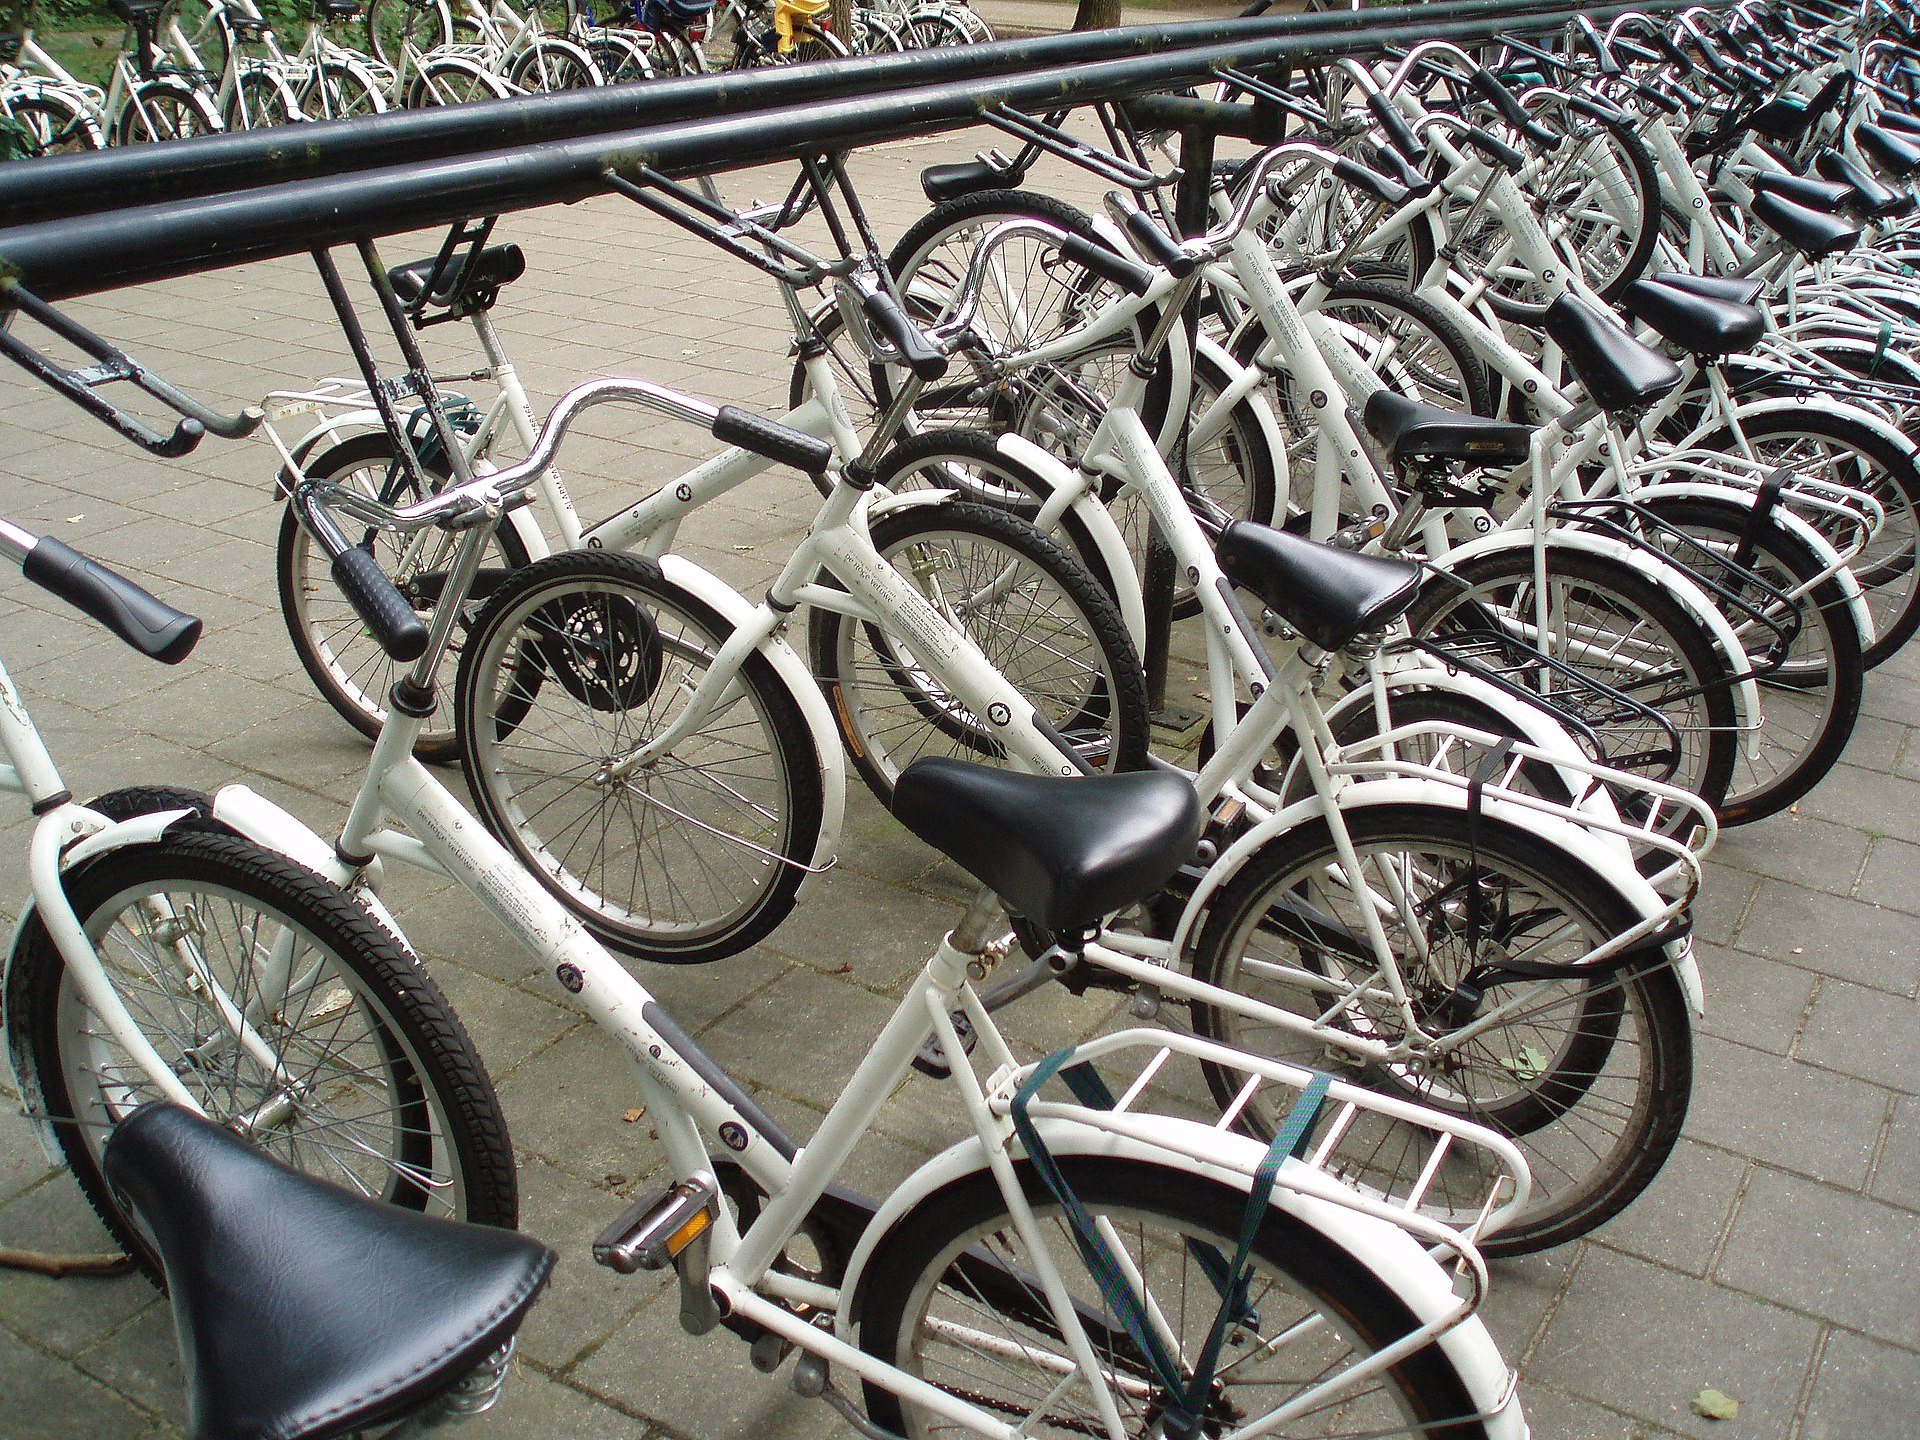


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
 
# <span style=" color:red">
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from skimpy import skim 
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [4]:
df = pd.read_csv('store_sharing.csv')

We gained general information about the data, and took a look at data types, and whether any empty data presents.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.describe()

cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend        season  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722752      0.022051      0.285403      1.492075  
std        2.341163      0.146854      0.451619      1.118911  
min        1.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000      1.000000  
75%        3.000000      0.000000      1.000000      2.000000  
max       26.000000      1.000000      1.000000      3.000000

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17414  │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean     ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ cnt               │    0 │      0 │     1100 │   1100 │      0 │   260 │   840 │   1700 │   7900 │   ▇▃▁   │  │
│ │ t1                │    0 │      0 │       12 │    5.6 │   -1.5 │     8 │    12 │     16 │     34 │  ▁▆▇▅▁  │  │
│ │ t2                │    0 │      0 │       12 │    6.6 │     -6 │     6 │    12 │     16 │     34 │  ▁▆▆▇▂  │  │
│ │ hum               │    0 │      0 │       72 │     14 │     20 │    63 │    74 │     83 │    100 │  ▁▃▆▇▅  │  │
│ │ wind_speed        │    0 │      0 │       16 │    7.9 │      0 │    10 │    15 │     20 │     56 │  ▅▇▅▁   │  │
│ │ weather_code      │    0 │      0 │      2.7 │    2.3 │      1 │     1 │     2 │      3 │     26 │   ▇▁    │  │
│ │ is_holiday        │    0 │      0 │    0.022 │   0.15 │      0 │     0 │     0 │      0 │      1 │    ▇    │  │
│ │ is_weekend        │    0 │      0 │     0.29 │   0.45 │      0 │     0 │     0 │      1 │      1 │ ▇    ▃  │  │
│ │ season            │    0 │      0 │      1.5 │    1.1 │      0 │     0 │     1 │      2 │      3 │ ▇ ▇ ▇▇  │  │
│ └───────────────────┴──────┴────────┴──────────┴────────┴────────┴───────┴───────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ timestamp                 │       0 │          0 │                            2 │                    34828 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [8]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [11]:
df[['weather_code', 'is_holiday', 'is_weekend', 'season']] = df[['weather_code', 'is_holiday', 'is_weekend', 'season']].astype(int)
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int32
is_holiday        int32
is_weekend        int32
season            int32
dtype: object

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1946043213.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(data=df, x='season', palette=palette)
C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1946043213.py:20: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data, x='is_holiday', palette=palette)
C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1946043213.py:30: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data, x='is_weekend', palette=palette)


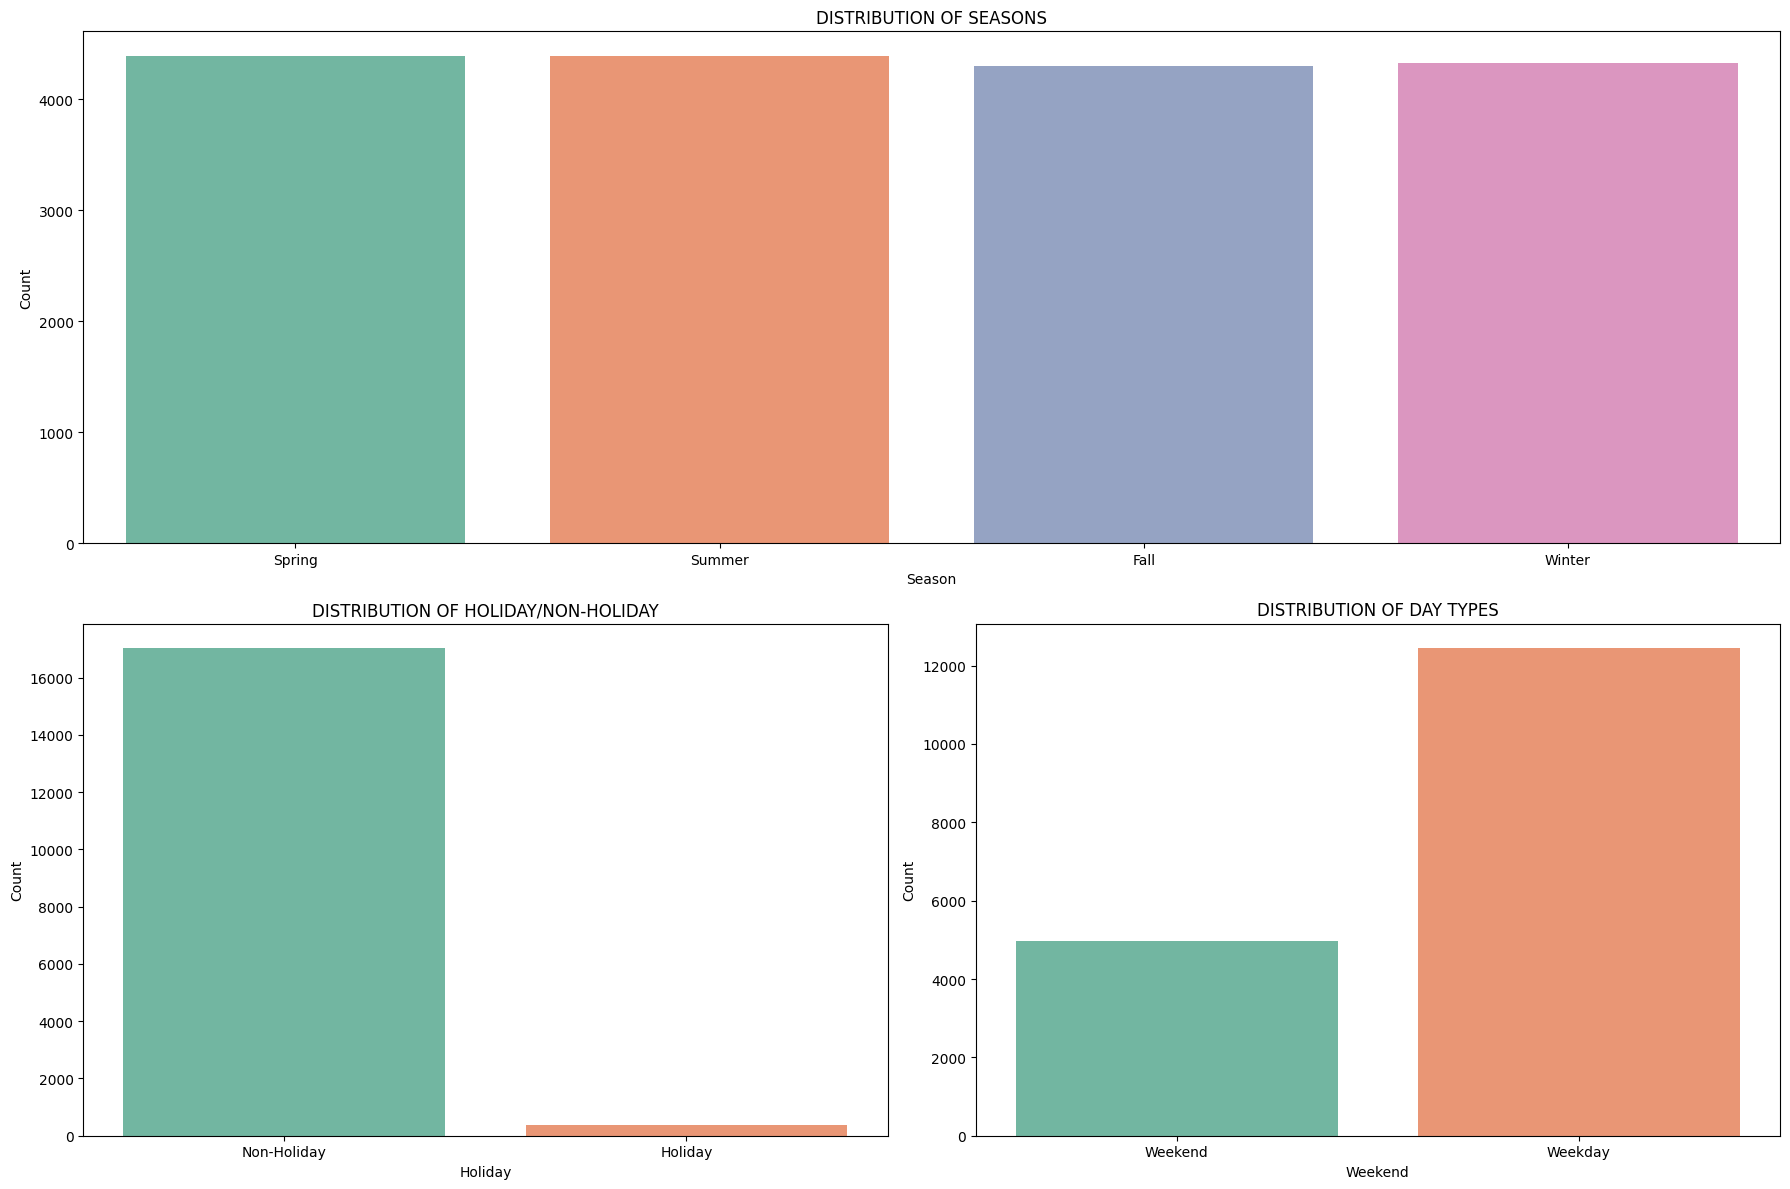

In [52]:

plt.figure(figsize=(18, 12))

# Define the palette for the plots
palette = sns.color_palette("Set2")

# Distribution of Season
plt.subplot(2, 1, 1)
season_labels = ["Spring", "Summer", "Fall", "Winter"]
sns.countplot(data=df, x='season', palette=palette)
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('DISTRIBUTION OF SEASONS')

# Distribution of Holiday
plt.subplot(2, 2, 3)
holiday_labels = ["Non-Holiday", "Holiday"]
data = df.copy()
data['is_holiday'] = df['is_holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
sns.countplot(data, x='is_holiday', palette=palette)
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('DISTRIBUTION OF HOLIDAY/NON-HOLIDAY')

# Distribution of Weekend
plt.subplot(2, 2, 4)
weekend_labels = ["Weekday", "Weekend"]
data = df.copy()
data['is_weekend'] = df['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
sns.countplot(data, x='is_weekend', palette=palette)
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('DISTRIBUTION OF DAY TYPES')


plt.tight_layout()
plt.show()

Shows the distributions of categorical variables in the dataset.
The first table shows the number of shared bicycles by season,
the second table shows the number of holidays and non-holiday days,
while the third table shows the number of weekdays and weekends.
The distributions shown indicate the periods in which the amount of shared bicycles increases,
and can help us understand which conditions are more common.

C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1366336196.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(new_labels)


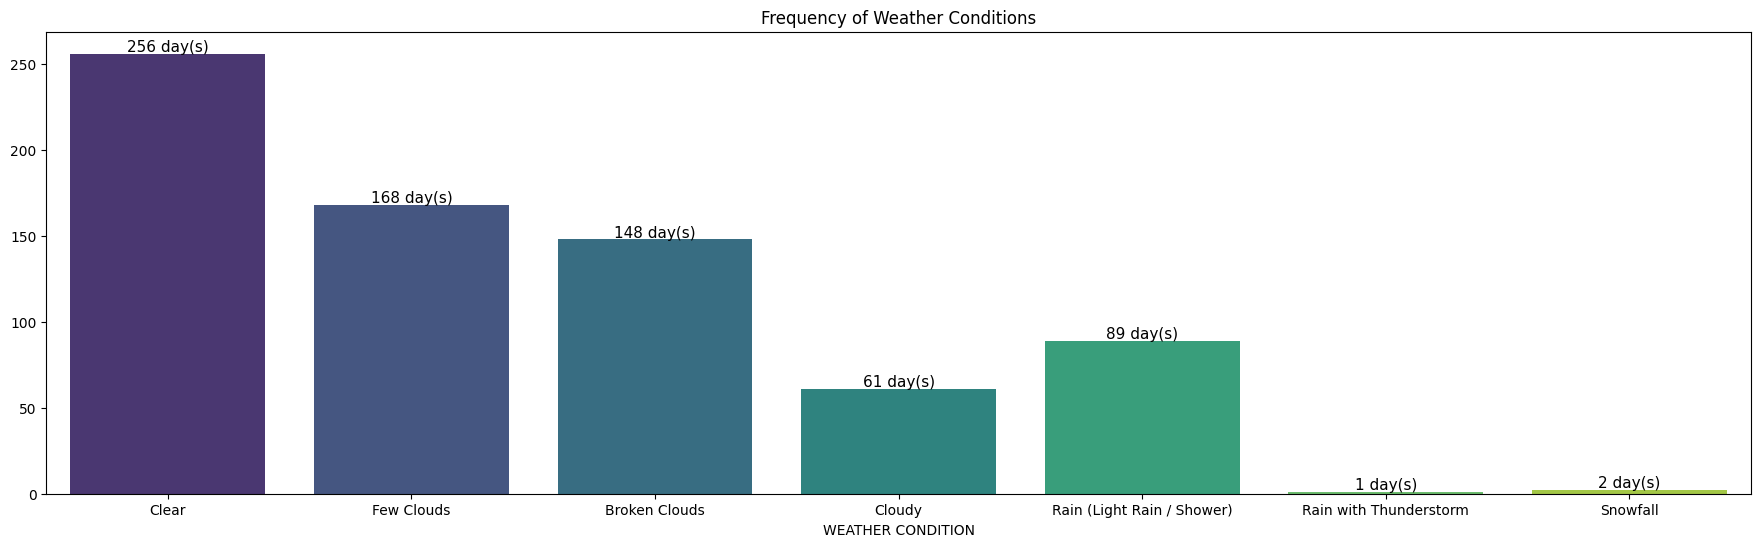

In [15]:
weather_labels = {
    0: "Clear",
    1: "Few Clouds", 2: "Broken Clouds", 3: "Cloudy",
    4: "Rain (Light Rain / Shower)", 5: "Rain with Thunderstorm",
    6: "Snowfall", 7: "Freezing Fog"
}
data = df.copy()
weather_code_counts = data['weather_code'].value_counts().sort_index()

weather_code_counts = round(weather_code_counts / 24)

# DataFrame for plotting
weather_code_df = weather_code_counts.reset_index()
weather_code_df.columns = ['weather_code', 'average_daily_count']

# Bar plot
plt.figure(figsize=(22, 6))
barplot = sns.barplot(data=weather_code_df, x='weather_code',
                      y='average_daily_count', palette='viridis')

# Custom x-axis labels
current_labels = barplot.get_xticks()
new_labels = [weather_labels.get(label, label) for label in current_labels]
barplot.set_xticklabels(new_labels)

# Annotate bars with average daily counts
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.0f} day(s)',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Labels and title
plt.xlabel('WEATHER CONDITION')
plt.ylabel('')
plt.title('Frequency of Weather Conditions')

plt.show()

C:\Users\cende\AppData\Local\Temp\ipykernel_14980\2299533860.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


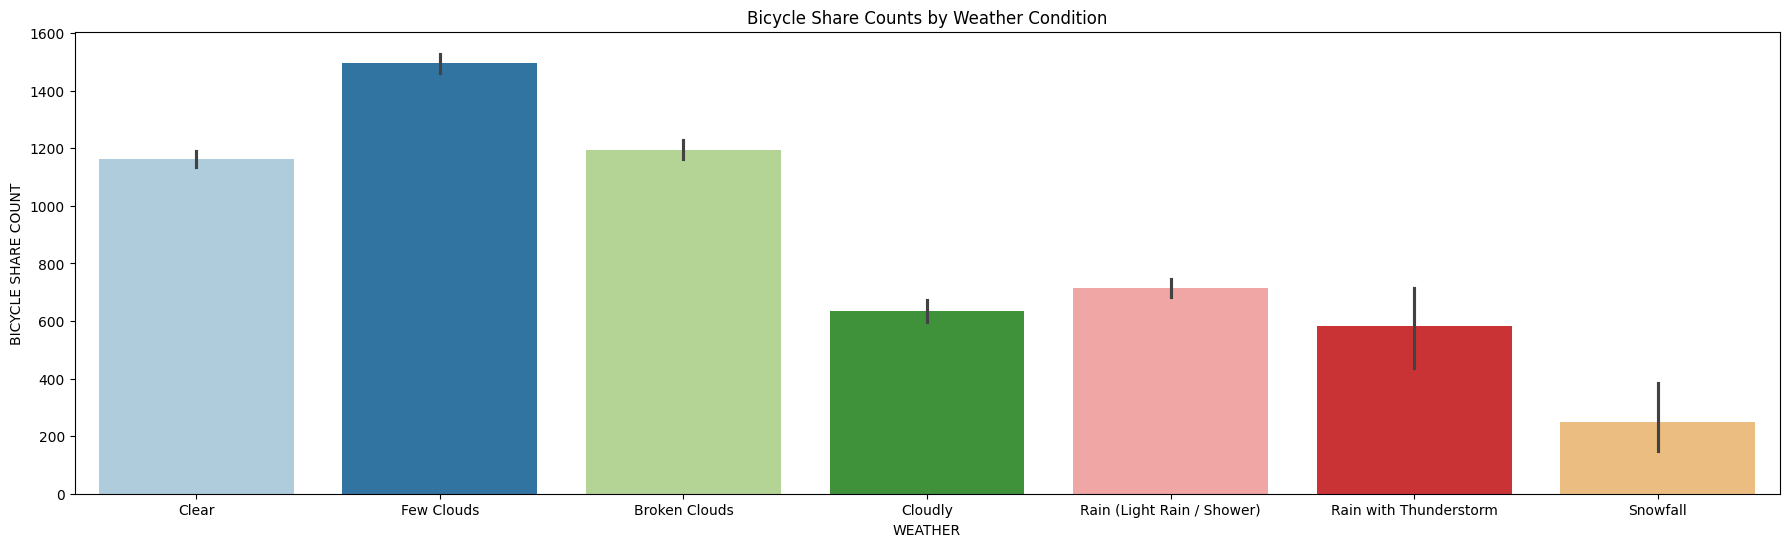

In [53]:

# weather codes
weather_labels = {0: "Clear",
                  1: "Few Clouds", 2: "Broken Clouds", 3: "Cloudly", 4: "Rain (Light Rain / Shower)",
                  5: "Rain with Thunderstorm", 6: "Snowfall", 7: "Freezing Fog"
                  }

# bar plot
plt.figure(figsize=(22, 6))
sns.barplot(data=df, x='weather_code', y='cnt', palette=("Paired"))

# custom x-axis labels
current_labels = plt.gca().get_xticks()
new_labels = [weather_labels.get(label, label) for label in current_labels]
plt.gca().set_xticklabels(new_labels)


# labels and title
plt.xlabel('WEATHER')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bicycle Share Counts by Weather Condition')

plt.show()

We see the average rates of bike sharing depending on various weather conditions.
It seems that bike sharing is less common on days when weather conditions are not desirable.

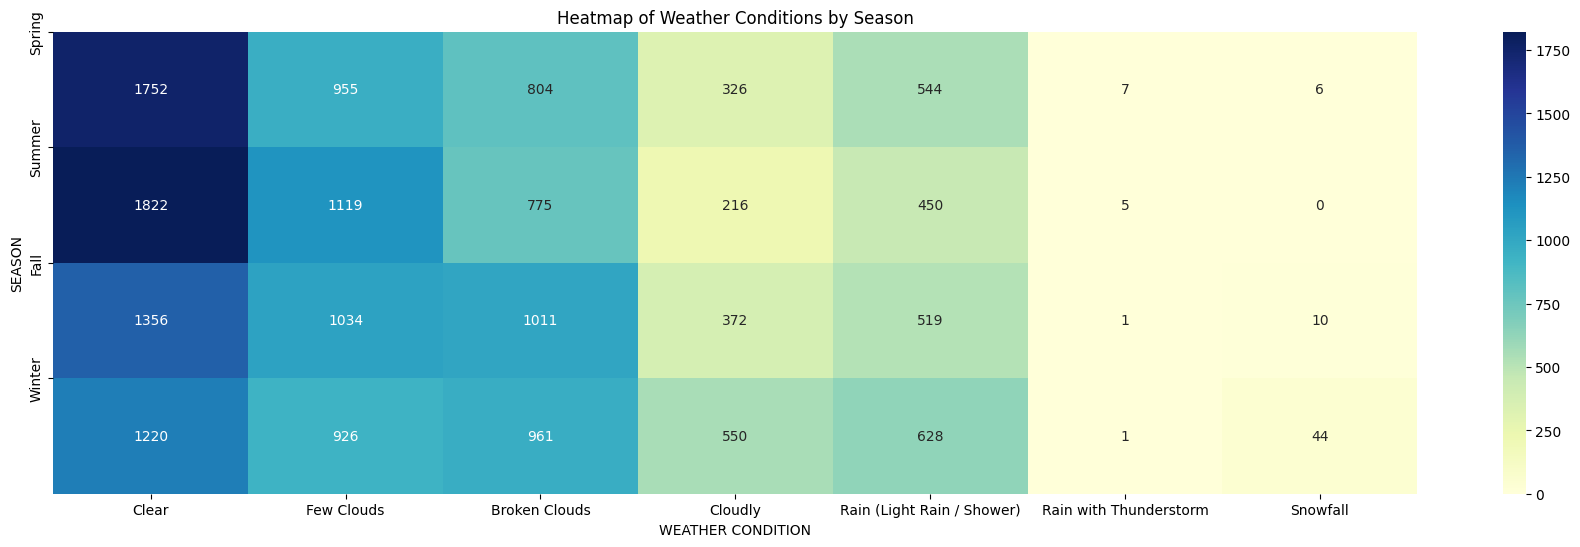

In [50]:

data = df.copy()
weather_season_crosstab = pd.crosstab(data['season'], data['weather_code'])

plt.figure(figsize=(22, 6))
sns.heatmap(weather_season_crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Weather Conditions by Season')
season_labels = ["Spring", "Summer", "Fall", "Winter"]
plt.yticks(ticks=[0, 1, 2, 3], labels=season_labels)

weather_labels = {0: "Clear",
                  1: "Few Clouds", 2: "Broken Clouds", 3: "Cloudly", 4: "Rain (Light Rain / Shower)",
                  5: "Rain with Thunderstorm", 6: "Snowfall", 7: "Freezing Fog"
                  }

new_labels = [weather_labels.get(label, label) for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.xlabel('WEATHER CONDITION')
plt.ylabel('SEASON')
plt.show()

The heatmap shows the frequency of cycling by season and weather code.
It provides clear information according to seasons and weather codes.

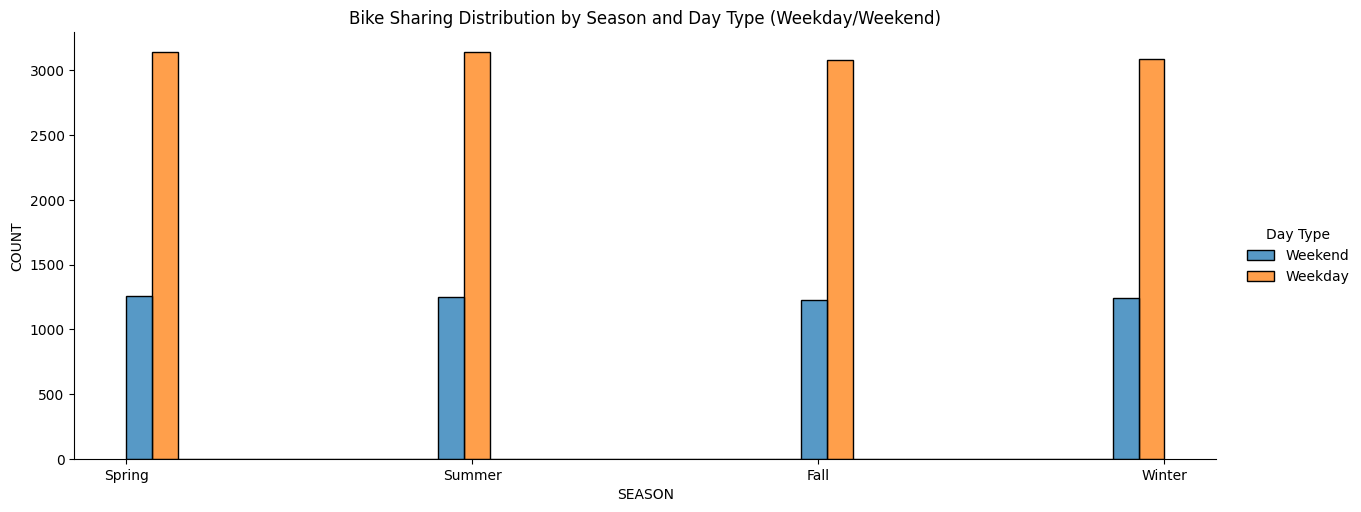

In [18]:
data = df.copy()
data['Day Type'] = df['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})
season_labels = ["Spring", "Summer", "Fall", "Winter"]

sns.displot(data, x='season', hue='Day Type', multiple='dodge', aspect=2.5)

plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)

plt.xlabel('SEASON')
plt.ylabel('COUNT')

plt.title('Bike Sharing Distribution by Season and Day Type (Weekday/Weekend)')

plt.show()

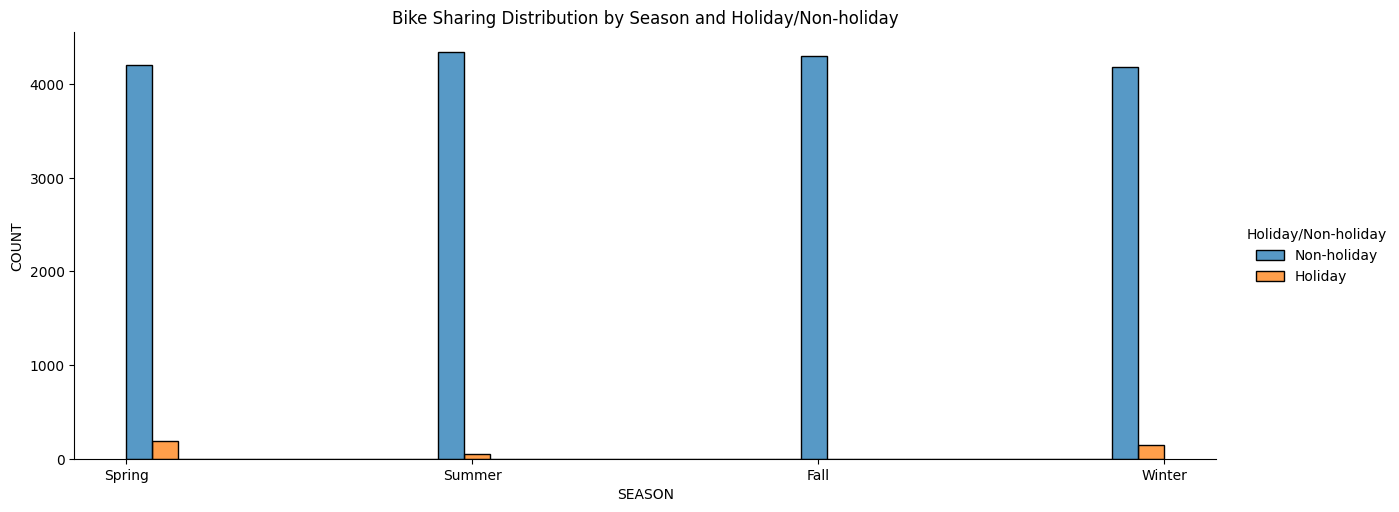

In [19]:
data = df.copy()
data['Holiday/Non-holiday'] = df['is_holiday'].map({0: 'Non-holiday', 1: 'Holiday'})
season_labels = ["Spring", "Summer", "Fall", "Winter"]

sns.displot(data, x='season', hue='Holiday/Non-holiday',
            multiple='dodge', aspect=2.5)

plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)

plt.xlabel('SEASON')
plt.ylabel('COUNT')

plt.title('Bike Sharing Distribution by Season and Holiday/Non-holiday')

plt.show()

The graphic shows the distribution of bike sharing between holidays and non-holidays according to seasons.
For each season, it compares the bike share distribution of holiday and non-holiday days.
In this way, it helps us understand the impact of different seasonal holidays on cycling.

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [20]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      int32
is_holiday        int32
is_weekend        int32
season            int32
dtype: object

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp']) 

In [23]:
df.set_index('timestamp')

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0             3   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0             1   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0             1   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0             1   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5             1   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0             3   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0             4   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0             4   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0             4   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0             2   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00           0           1       3  
2015-01-04 01:00:00           0           1       3  
2015-01-04 02:00:00           0           1       3  
2015-01-04 03:00:00           0           1       3  
2015-01-04 04:00:00           0           1       3  
...                         ...         ...     ...  
2017-01-03 19:00:00           0           0       3  
2017-01-03 20:00:00           0           0       3  
2017-01-03 21:00:00           0           0       3  
2017-01-03 22:00:00           0           0       3  
2017-01-03 23:00:00           0           0       3  

[17414 rows x 9 columns]

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

In [24]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_the_week'] = df['timestamp'].dt.day_of_week+1
df['day_of_the_month'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1419333982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.drop(columns=['season', 'hour', 'year'], inplace=True)
C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1419333982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.rename(columns={'cnt': 'Shares', 't1': 'Real Temperature',


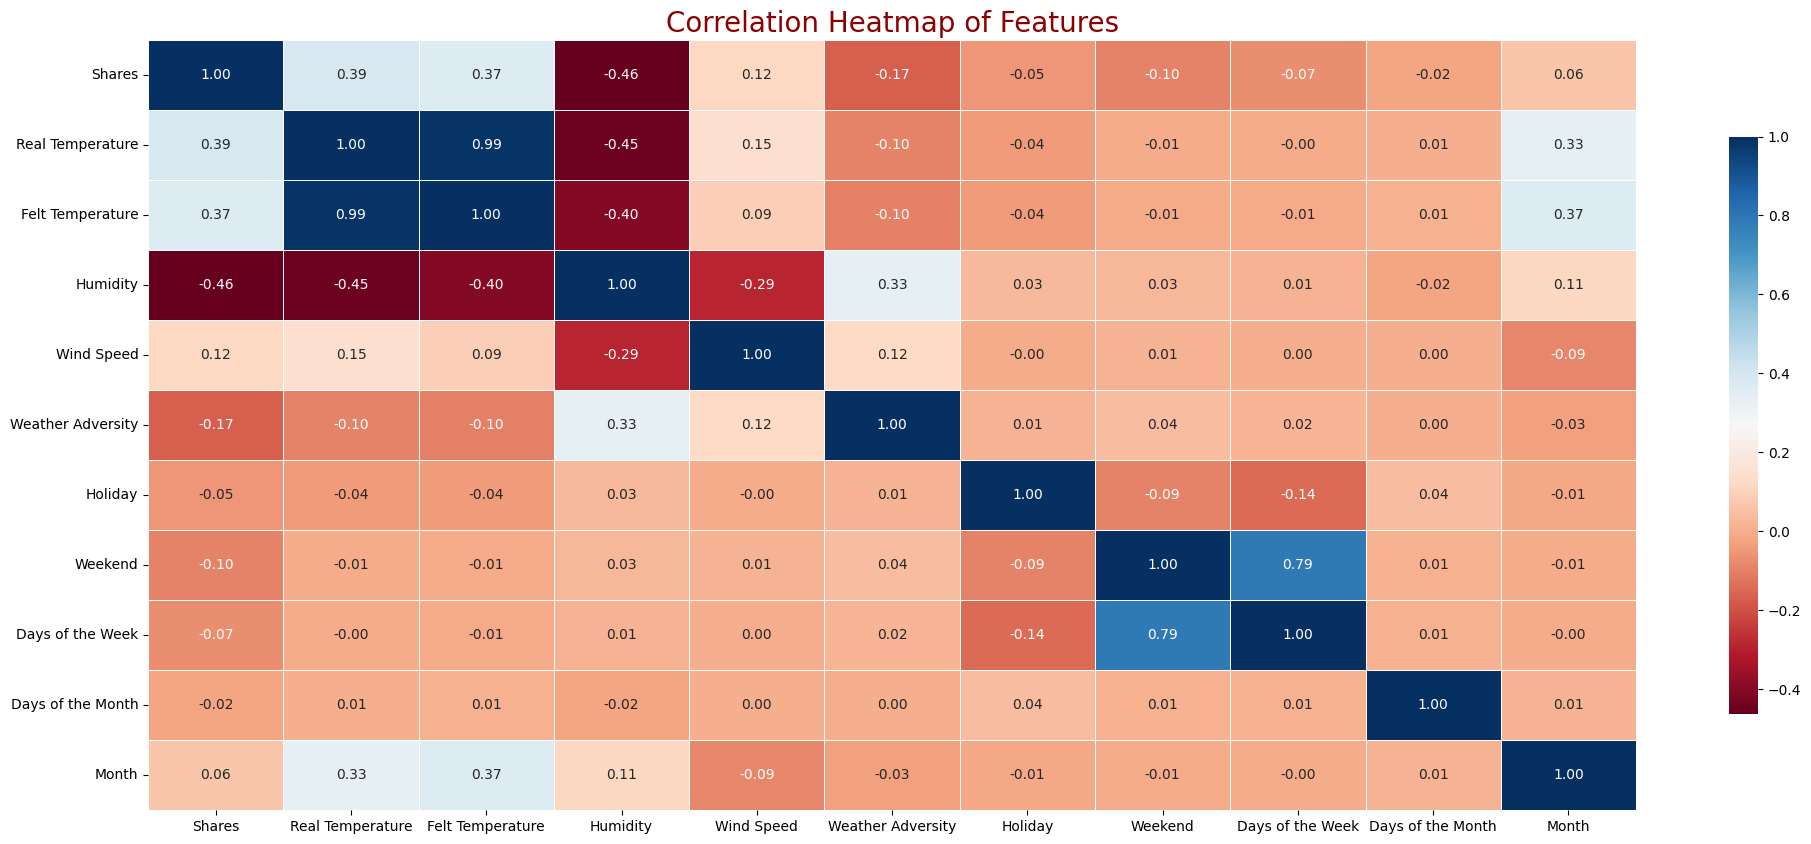

In [26]:
data = df.copy()
numeric_columns = data.select_dtypes(include=[np.number])

numeric_df = data[numeric_columns.columns]
numeric_df.drop(columns=['season', 'hour', 'year'], inplace=True)
numeric_df.rename(columns={'cnt': 'Shares', 't1': 'Real Temperature',
                  't2': 'Felt Temperature', 'hum': 'Humidity', 'wind_speed': 'Wind Speed', 'weather_code': 'Weather Adversity', 
                  'is_holiday': 'Holiday', 'is_weekend': 'Weekend', 'day_of_the_week': 'Days of the Week', 'day_of_the_month': 'Days of the Month', 'month':'Month'}, inplace=True)

plt.figure(figsize=(24, 10))

sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap='RdBu', cbar_kws={"shrink": .75})

plt.title("Correlation Heatmap of Features",fontdict={'fontsize': 20, 'color': 'darkred'})

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

C:\Users\cende\AppData\Local\Temp\ipykernel_14980\1160074519.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(new_labels)


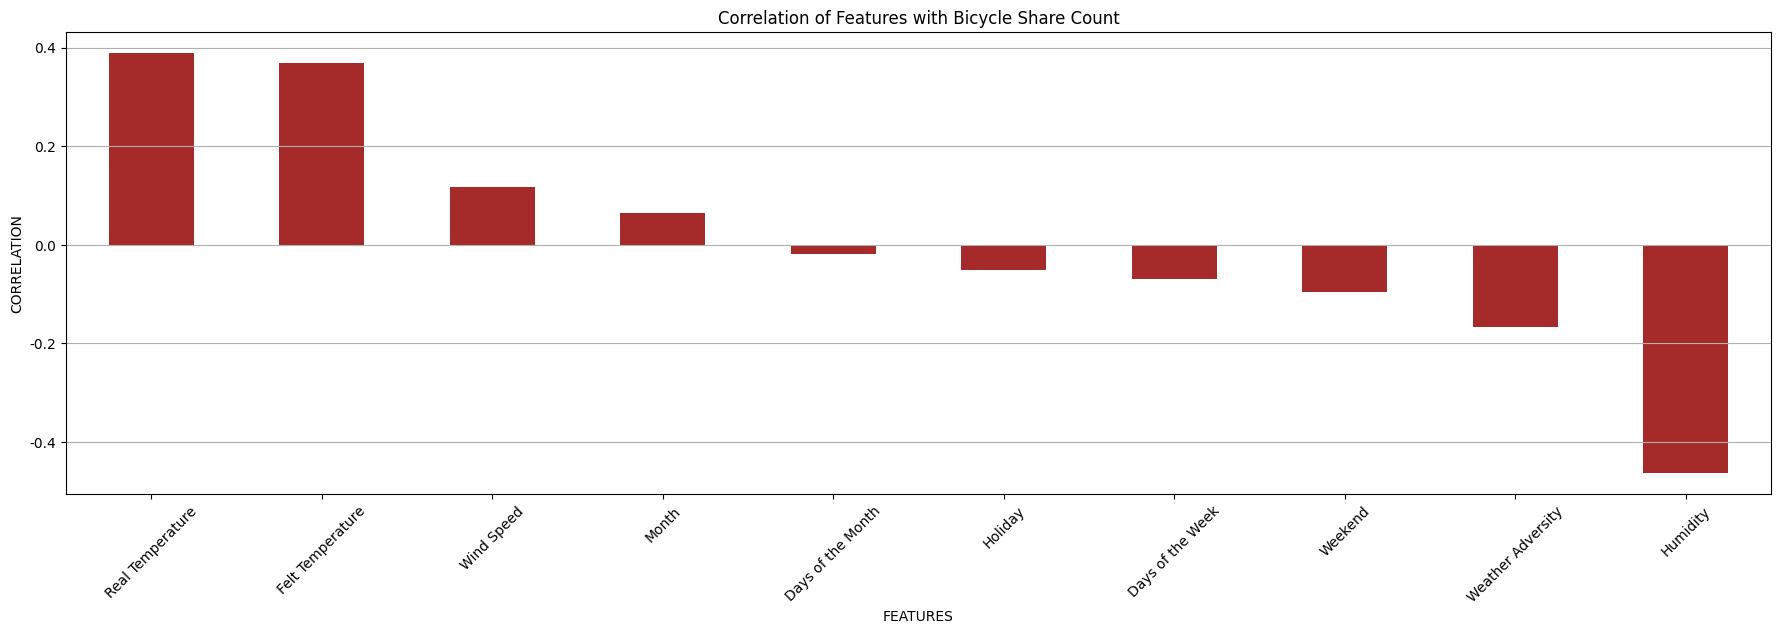

In [27]:
data = df.copy()

df_cor_cnt = data[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'day_of_the_week', 'day_of_the_month', 'month']]

df_cor_cnt = df_cor_cnt.rename(columns={'cnt':'cnt', 't1': 'Real Temperature', 't2': 'Felt Temperature', 'hum': 'Humidity',
                                        'wind_speed': 'Wind Speed', 'weather_code': 'Weather Adversity', 'is_holiday': 'Holiday', 'is_weekend': 'Weekend', 'day_of_the_week': 'Days of the Week', 'day_of_the_month': 'Days of the Month', 'month': 'Month'})


# Calculate the correlations with the target variable
correlation_with_target = df_cor_cnt.corr()['cnt'].sort_values(ascending=False)

# Visualize the correlations with a bar plot

plt.figure(figsize=(22, 6))
correlation_with_target.drop('cnt').plot(kind='bar', color='brown')


plt.title('Correlation of Features with Bicycle Share Count')

plt.xlabel('FEATURES')

plt.ylabel('CORRELATION')

plt.xticks(rotation=45)

plt.grid(axis='y')


# Customize y-axis labels

labels = plt.gca().get_yticks().tolist()

new_labels = [f'{label:.1f}' for label in labels]

plt.gca().set_yticklabels(new_labels)
plt.show()

The graphic visualizes the correlation between bike share count and various features.
According to the results, 'Real Temperature' and 'Felt Temperature' have the strongest positive correlation with bike sharing, while 'Weather Adversity' and 'Humidity' show a negative correlation. This shows that cycling increases as temperatures increase, and shows that high humidity and adverse weather conditions reduce the cycling use.

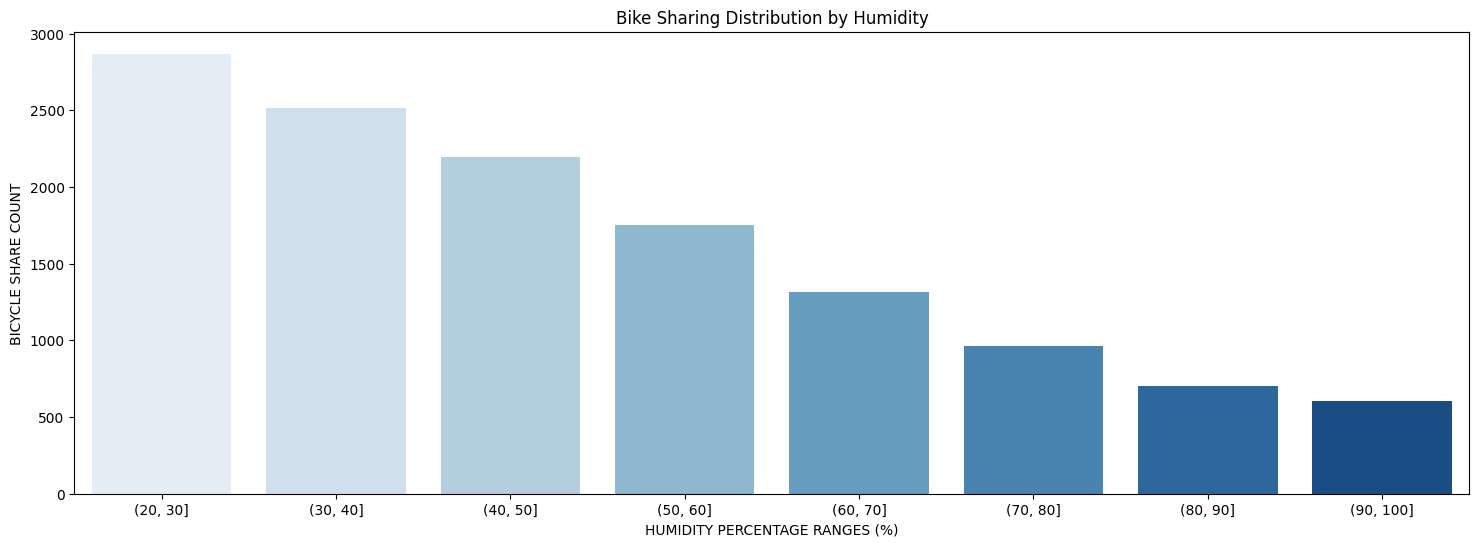

In [28]:
plt.figure(figsize=(18, 6))
arr = df['hum']

hum_range = [x for x in range(20, 110, 10)]

groups = pd.cut(arr, hum_range)

result = pd.DataFrame({'value': arr, 'group': groups})

df['hum_group'] = result['group']
plt.xlabel('HUMIDITY PERCENTAGE RANGES (%)')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Humidity')


sns.barplot(df, x='hum_group', y="cnt", errorbar=None, palette="Blues")
plt.show()

The graph shows the effect of different humidity levels on the number of bike shares.
In the graph, it is observed that cycling usage is highest in the 20-30% humidity range, 
while usage decreases significantly in the 90-100% range.
This indicates that high humidity levels impact cycling negatively.

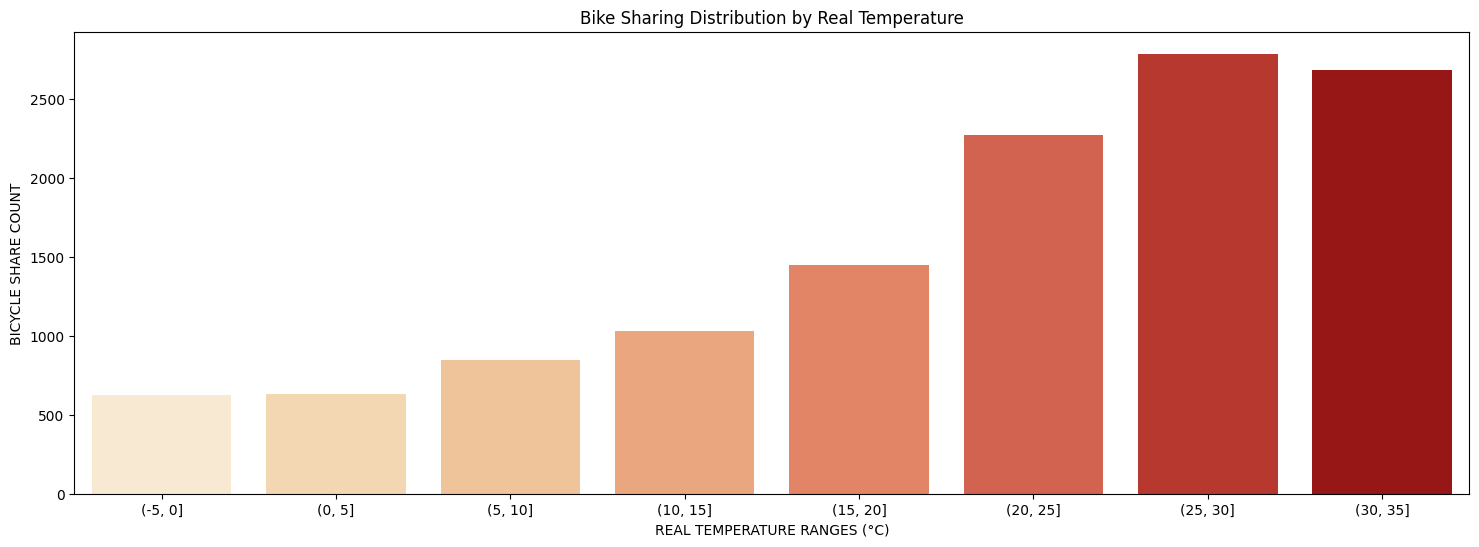

In [29]:
plt.figure(figsize=(18, 6))
arr = df['t1']

groups = pd.cut(arr, [-5, 0, 5, 10, 15, 20, 25, 30, 35])

result = pd.DataFrame({'value': arr, 'group': groups})

df['t1_group'] = result['group']

plt.xlabel('REAL TEMPERATURE RANGES (°C)')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Real Temperature')

sns.barplot(df, x='t1_group', y="cnt", errorbar=None, palette="OrRd")
plt.show()

The effect of different real temperature ranges on the number of bike shares are obvious.
In the graph, cycling is the highest in the temperature range of 25-30°C.
It is observed that cycling usage decreases significantly at temperatures below 5°C.
This means that mild temperatures present optimal conditions for cycling,
It shows that extremely cold and hot weather conditions affect cycling negatively.

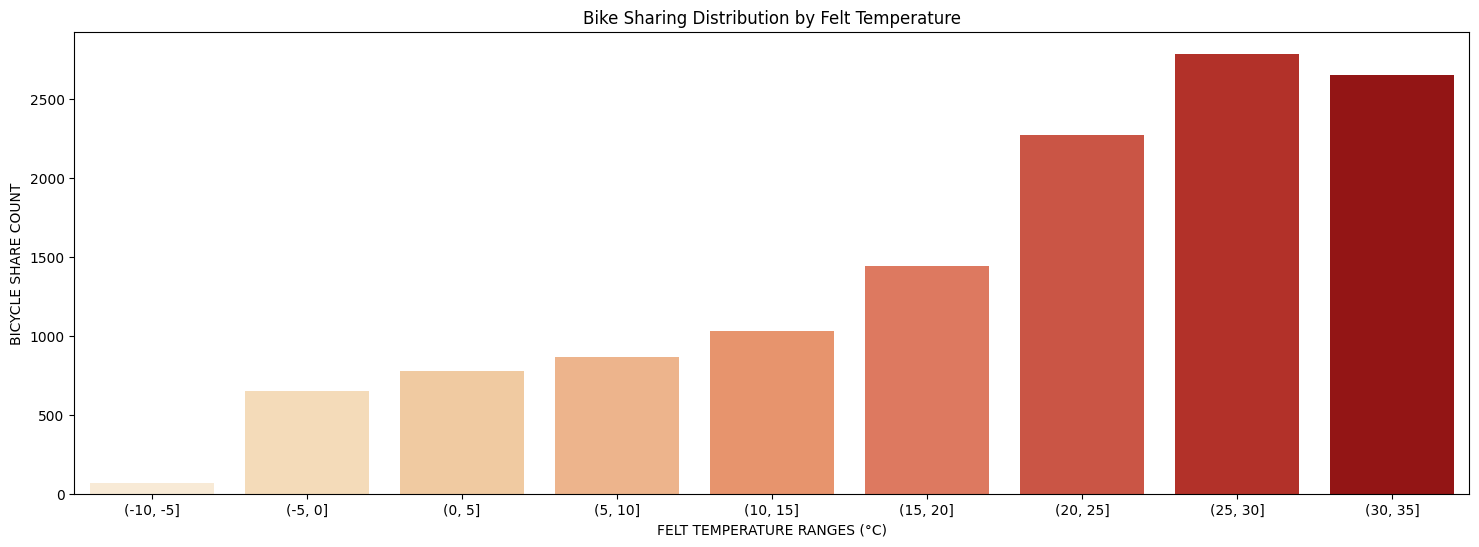

In [30]:
plt.figure(figsize=(18, 6))
arr2 = df['t2']

groups2 = pd.cut(arr2, [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35])

result2 = pd.DataFrame({'value': arr2, 'group': groups2})

df['t2_group'] = result2['group']

plt.xlabel('FELT TEMPERATURE RANGES (°C)')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Felt Temperature')

sns.barplot(df, x='t2_group', y="cnt", errorbar=None, palette="OrRd")
plt.show()

The felt temperature yields similar effect with the real temperature. It, therefore, shows the optimal felt temperature ranges for cycling, and indicates that extremely cold and hot weather conditions negatively affect cycling.
Although there are slight differences between actual temperature and felt temperature values, they generally show a parallel change.

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

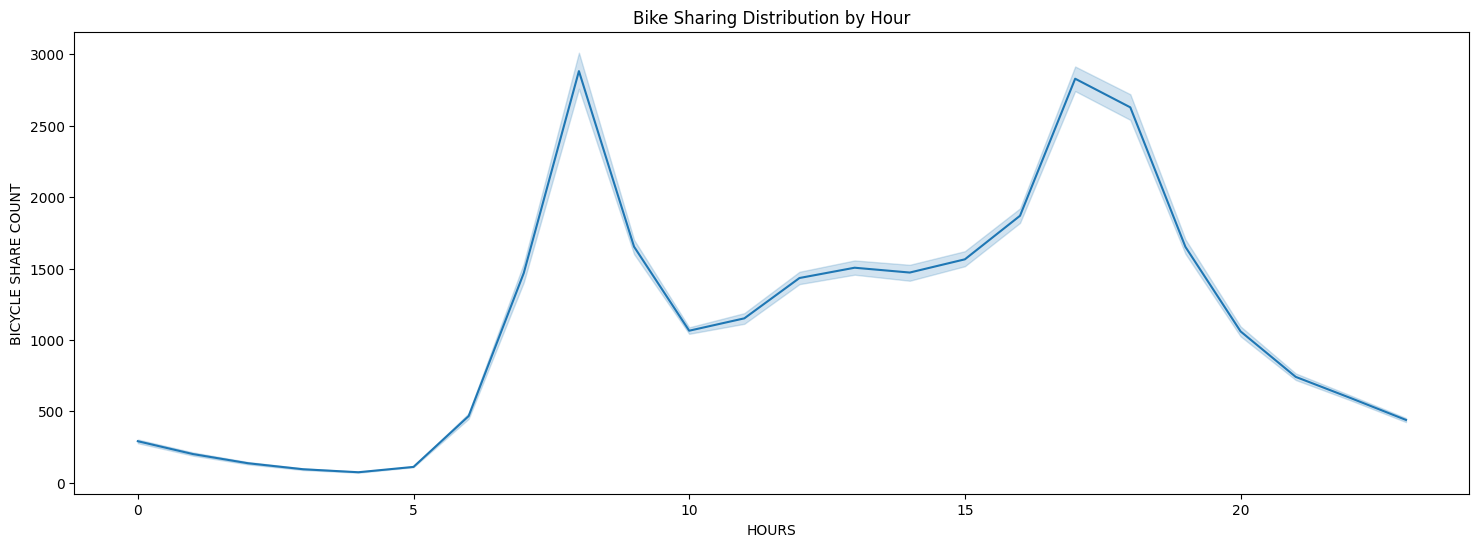

In [31]:
plt.figure(figsize=(18, 6))
plt.xlabel('HOURS')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Hour')



sns.lineplot(data=df, x='hour', y="cnt")
plt.show()

It can be observed that cycling increases significantly in the early morning hours (between 7-9 am).
This may indicate that people use bicycles to get to work or school.
An increase in bicycle use can be observed again in the evening hours (between 17-19).
This may also indicate that people are cycling on their way home from work or school.

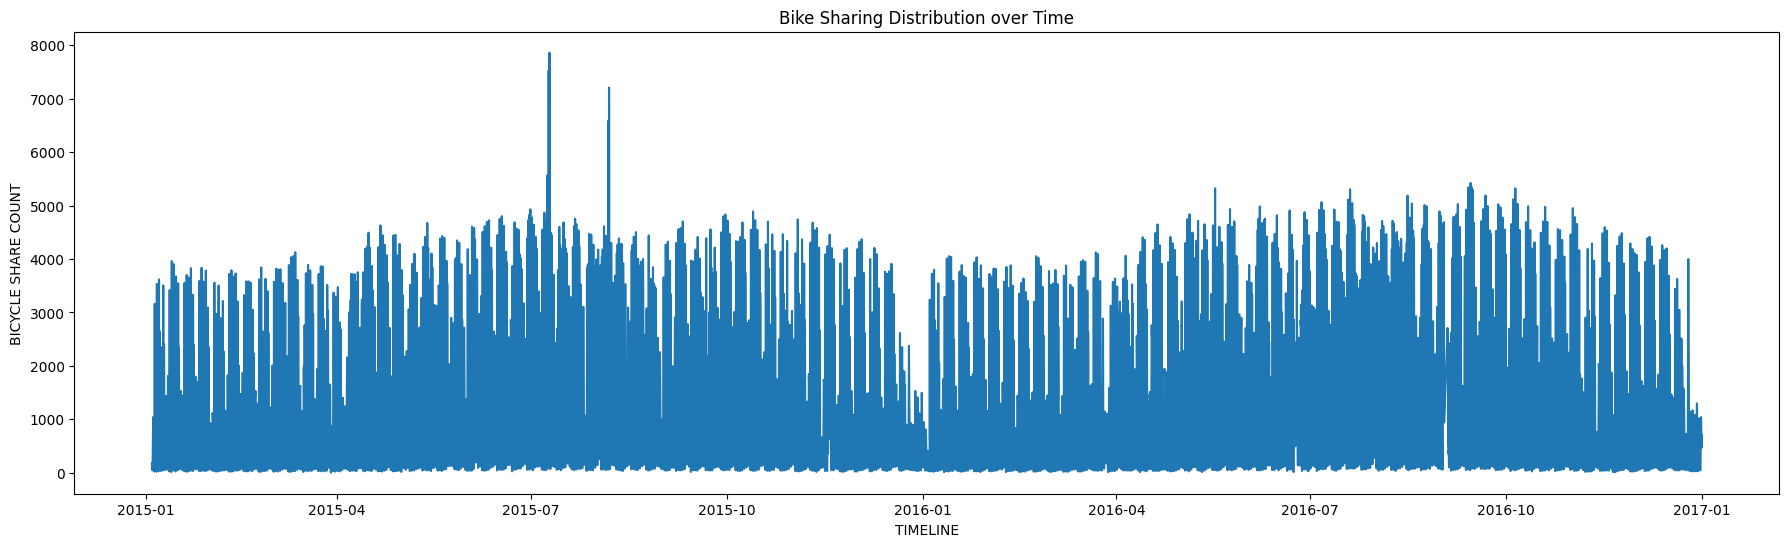

In [32]:
data = df.copy()
plt.figure(figsize=(22, 6))
filtered_df = data[data['year'].isin([2015, 2016])]
plt.xlabel('TIMELINE')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution over Time')
sns.lineplot(filtered_df, x='timestamp', y="cnt")
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

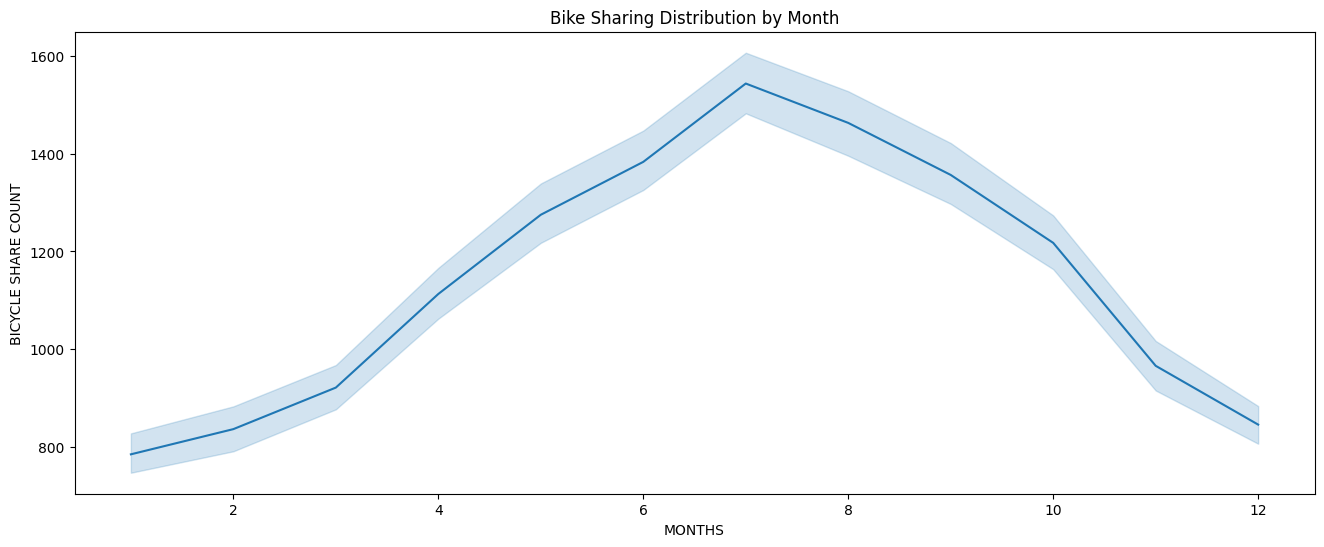

In [33]:
plt.figure(figsize=(16, 6))
plt.xlabel('MONTHS')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Month')



sns.lineplot(data=df, x='month', y="cnt")
plt.show()

The chart clearly shows how cycling varies seasonally.
It is advisable to increase the capacity in response to the increasing demand in the summer months, and to decrease the capacity in the winter months, when a significant decrease in demand are observable.
Plans towards developing cost management strategies can be made.
Special campaigns or discounts may be organized to promote usage during the winter and autumn months.

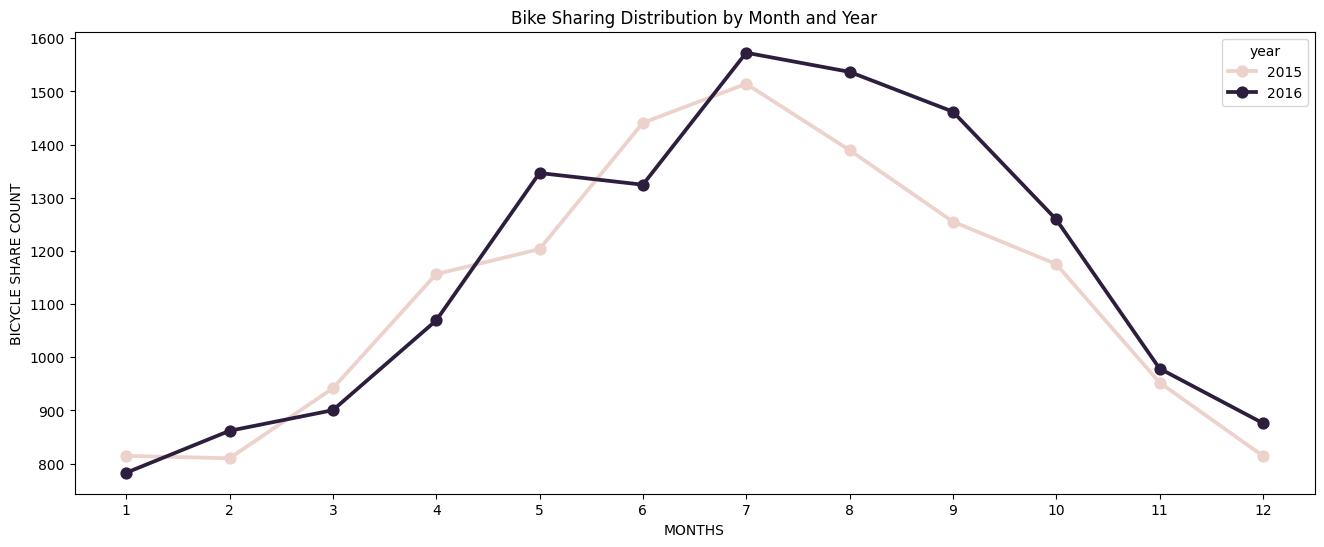

In [34]:
data = df.copy()
plt.figure(figsize=(16, 6))
filtered_df = data[data['year'].isin([2015, 2016])]
plt.xlabel('MONTHS')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Month and Year')


sns.pointplot(filtered_df, x='month', y="cnt",hue='year', errorbar=None)
plt.show()

The graph shows the change in the number of bicycle sharing by years and months.
The cycling trend for each month of each year is visualized comparatively.
It seems that bike sharing is highest in the summer months.

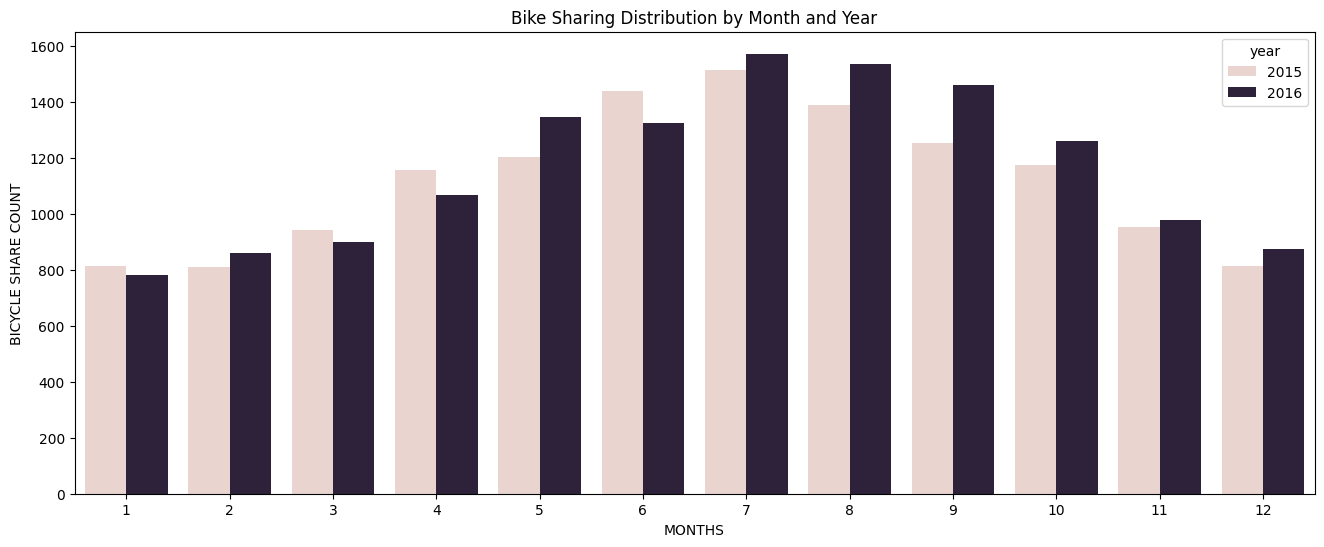

In [35]:
data = df.copy()
plt.figure(figsize=(16, 6))
filtered_df = data[data['year'].isin([2015, 2016])]
plt.xlabel('MONTHS')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Month and Year')


sns.barplot(filtered_df, x='month', y="cnt",
            hue='year', errorbar=None)
plt.show()

The chart shows the average number of bike shares for each month in different years, and compares cycling usage for each month of each year.

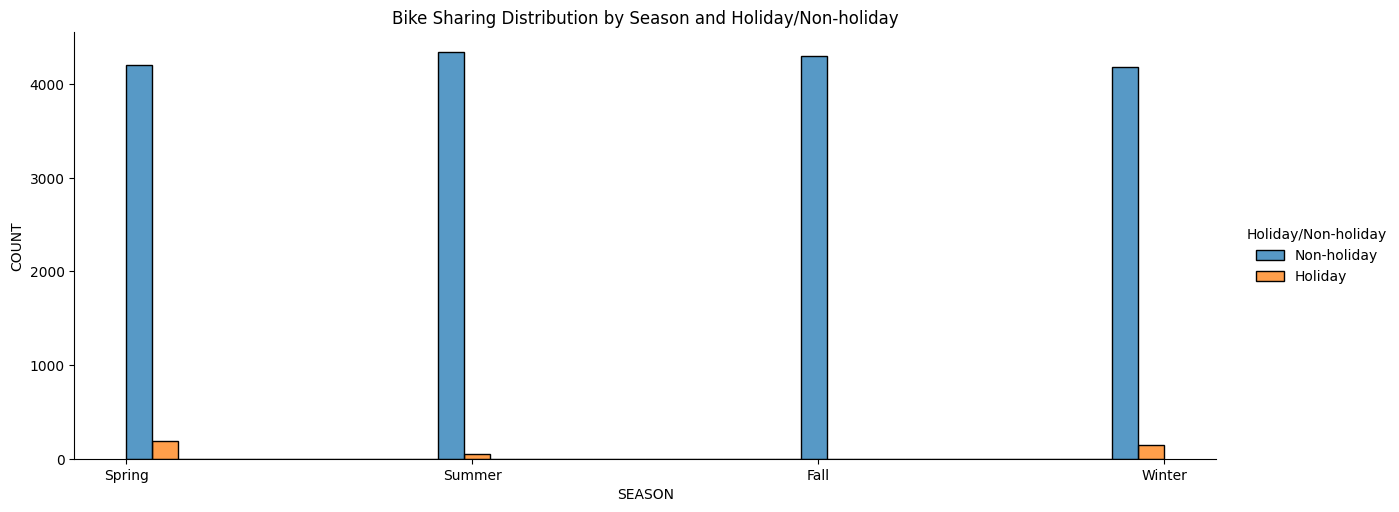

In [36]:
data = df.copy()
data['Holiday/Non-holiday'] = df['is_holiday'].map(
    {0: 'Non-holiday', 1: 'Holiday'})
season_labels = ["Spring", "Summer", "Fall", "Winter"]

sns.displot(data, x='season', hue='Holiday/Non-holiday',
            multiple='dodge', aspect=2.5)

plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)

plt.xlabel('SEASON')
plt.ylabel('COUNT')

plt.title('Bike Sharing Distribution by Season and Holiday/Non-holiday')

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

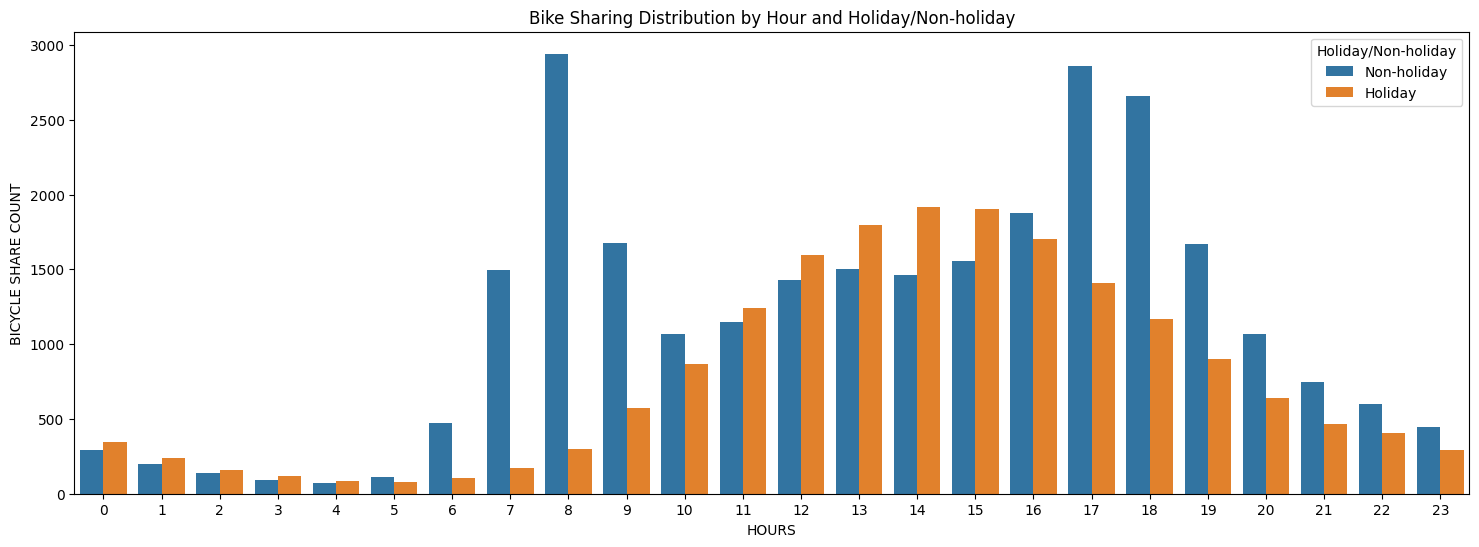

In [37]:
plt.figure(figsize=(18, 6))

data = df.copy()
data['Holiday/Non-holiday'] = df['is_holiday'].map(
    {0: 'Non-holiday', 1: 'Holiday'})

plt.xlabel('HOURS')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Hour and Holiday/Non-holiday')


sns.barplot(data, x='hour', y="cnt", hue='Holiday/Non-holiday', errorbar=None)
plt.show()

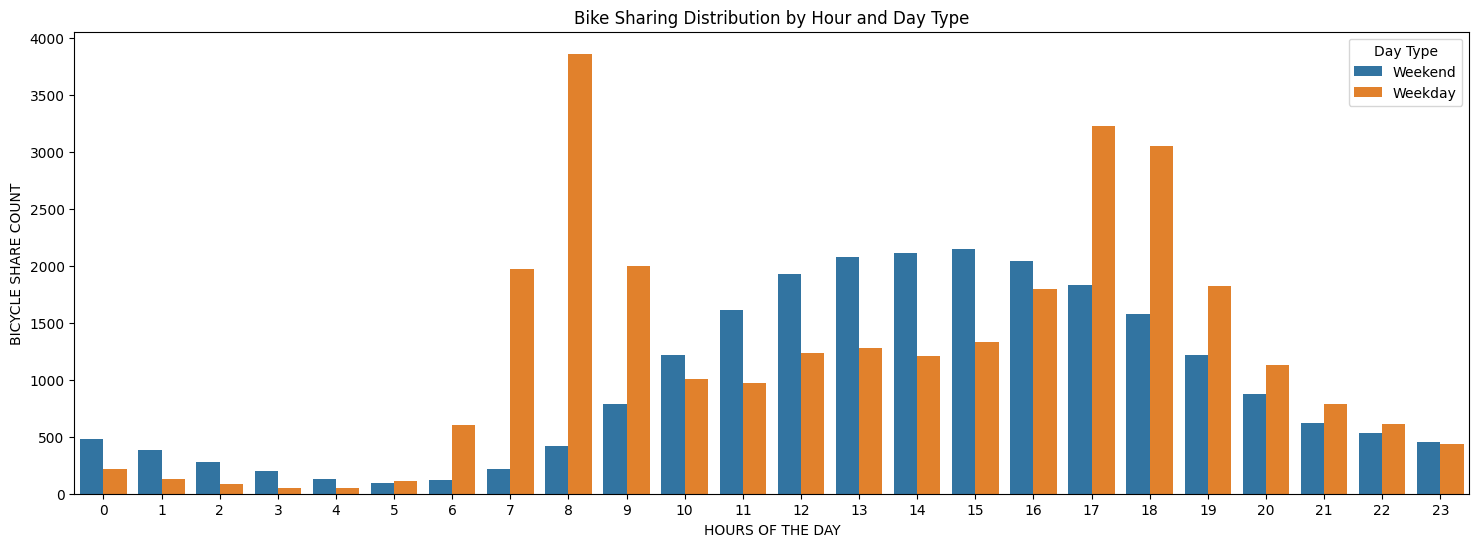

In [38]:
plt.figure(figsize=(18, 6))

data = df.copy()
data['Day Type'] = df['is_weekend'].map(
    {0: 'Weekday', 1: 'Weekend'})

plt.xlabel('HOURS OF THE DAY')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Hour and Day Type')


sns.barplot(data, x='hour', y="cnt", hue='Day Type', errorbar=None)
plt.show()

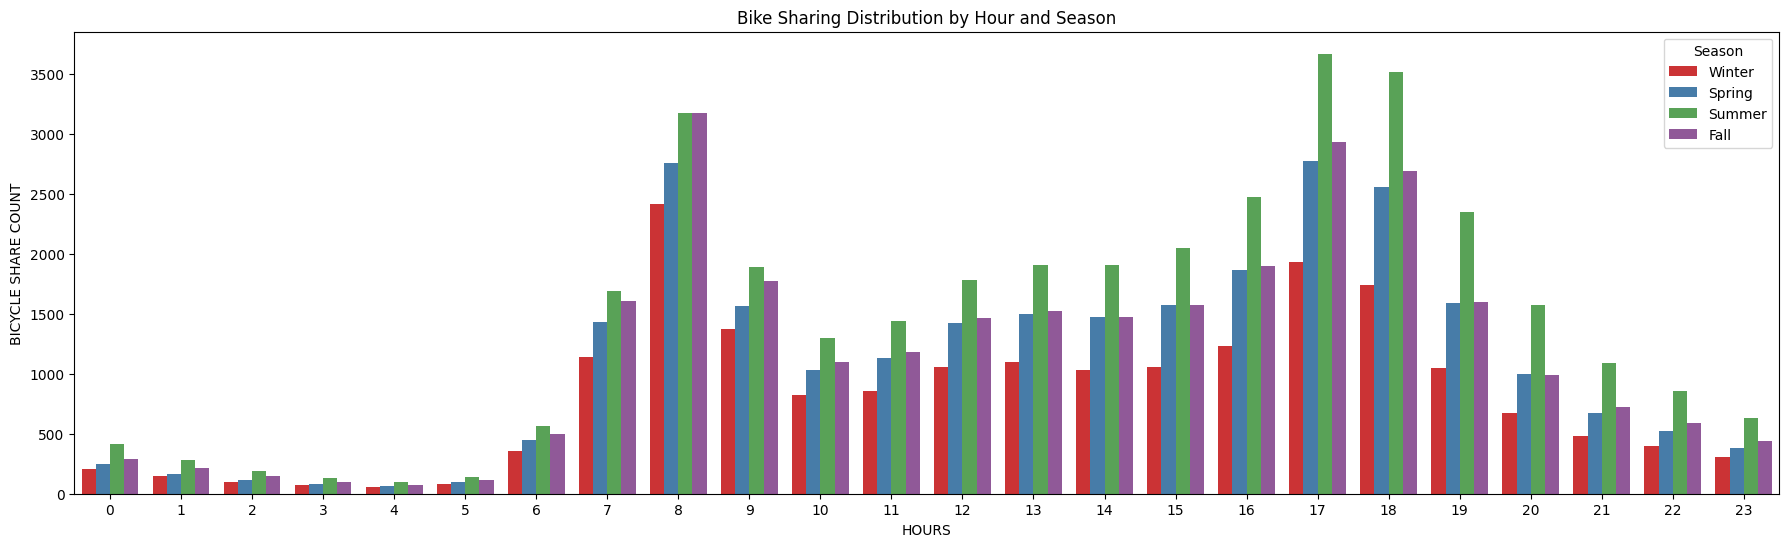

In [39]:
plt.figure(figsize=(22, 6))
data = df.copy()
data['Season'] = df['season'].map(
    {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'})

plt.xlabel('HOURS')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Hour and Season')




sns.barplot(data, x='hour', y="cnt", hue='Season',
            errorbar=None, palette=("Set1"))
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

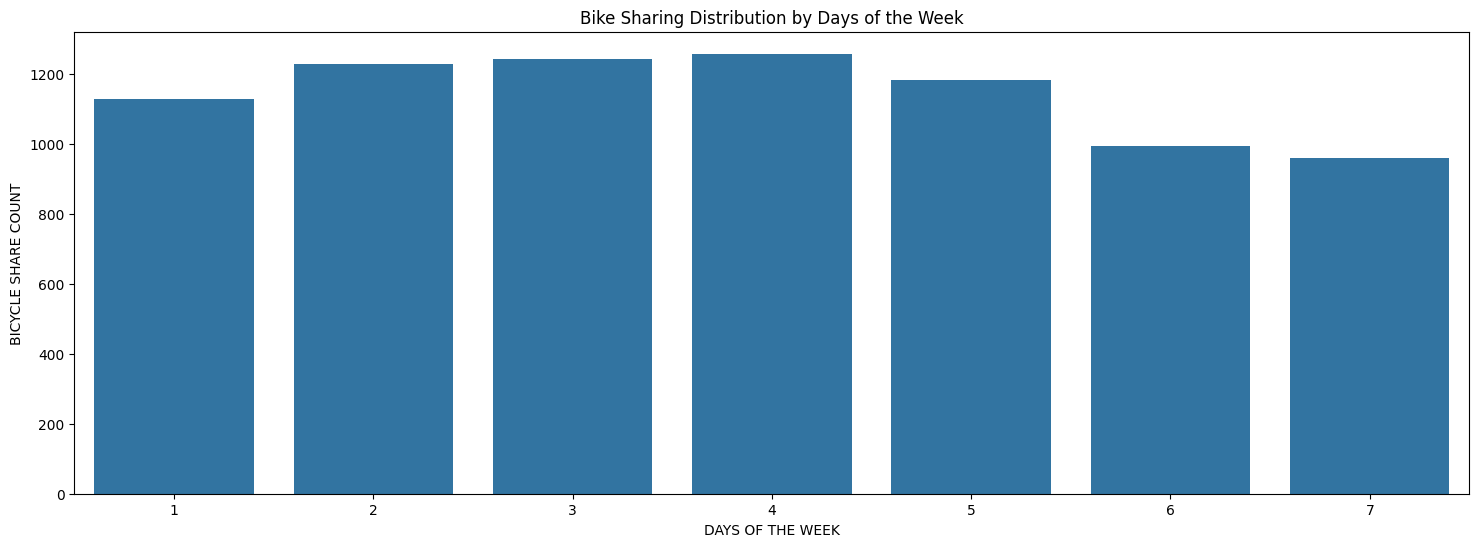

In [40]:
plt.figure(figsize=(18, 6))
plt.xlabel('DAYS OF THE WEEK')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Days of the Week')


sns.barplot(df, x='day_of_the_week', y="cnt", errorbar=None)
plt.show()

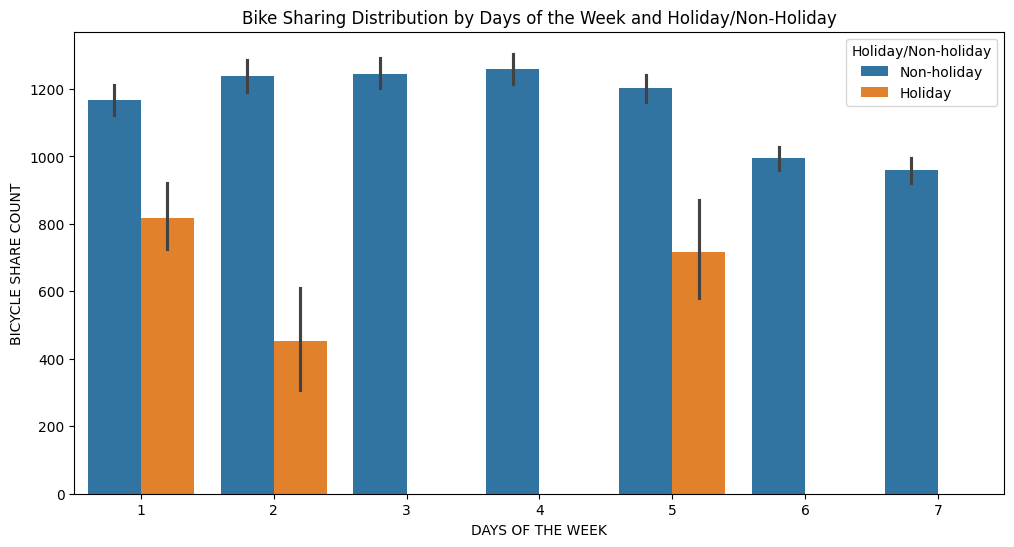

In [41]:
plt.figure(figsize=(12, 6))
data = df.copy()
data['Holiday/Non-holiday'] = df['is_holiday'].map(
    {0: 'Non-holiday', 1: 'Holiday'})
plt.xlabel('DAYS OF THE WEEK')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Days of the Week and Holiday/Non-Holiday')



sns.barplot(data, x='day_of_the_week', y="cnt", hue='Holiday/Non-holiday')
plt.show()

This chart shows how cycling varies depending on holiday status on different days of the week.

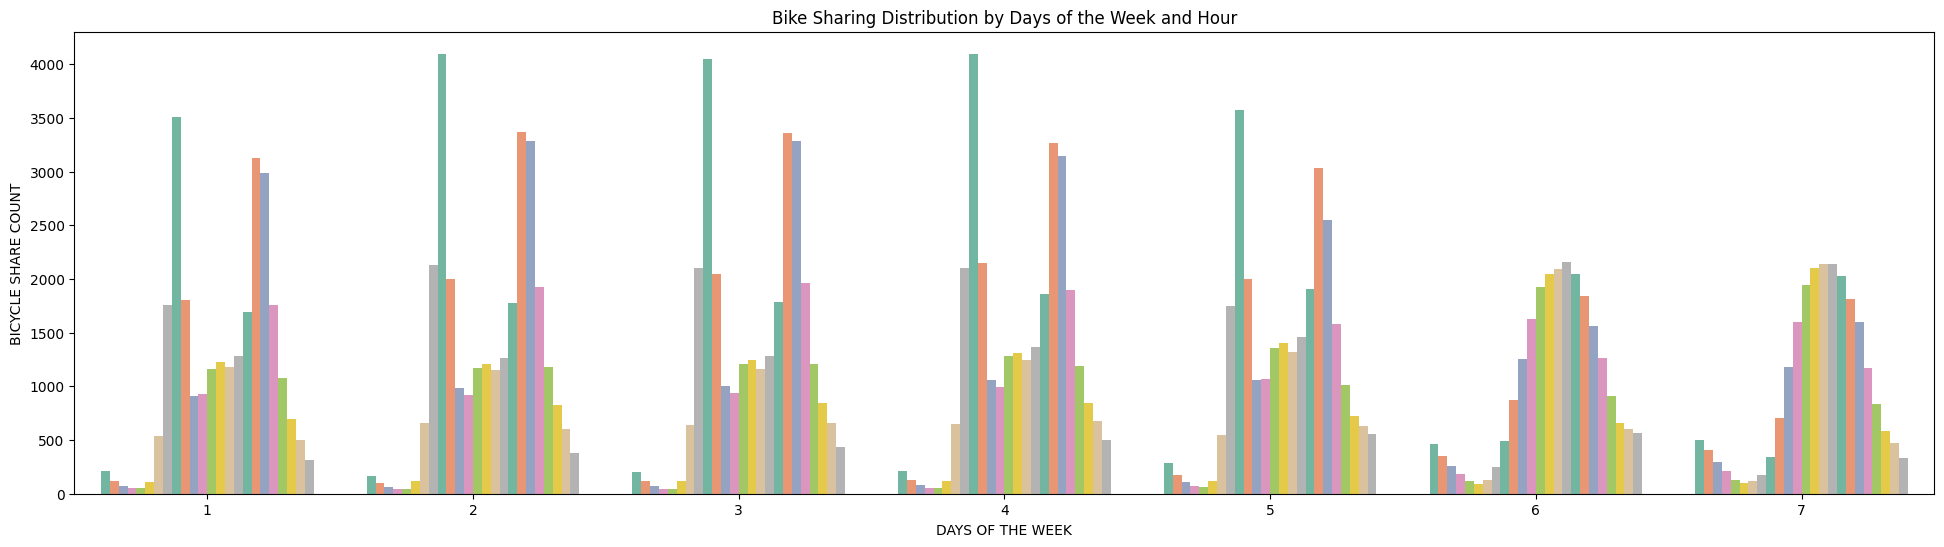

In [42]:
plt.figure(figsize=(24, 6))
plt.xlabel('DAYS OF THE WEEK')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Days of the Week and Hour')



sns.barplot(df, x='day_of_the_week', y="cnt",
            hue='hour', errorbar=None, palette='Set2')
plt.legend().remove()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

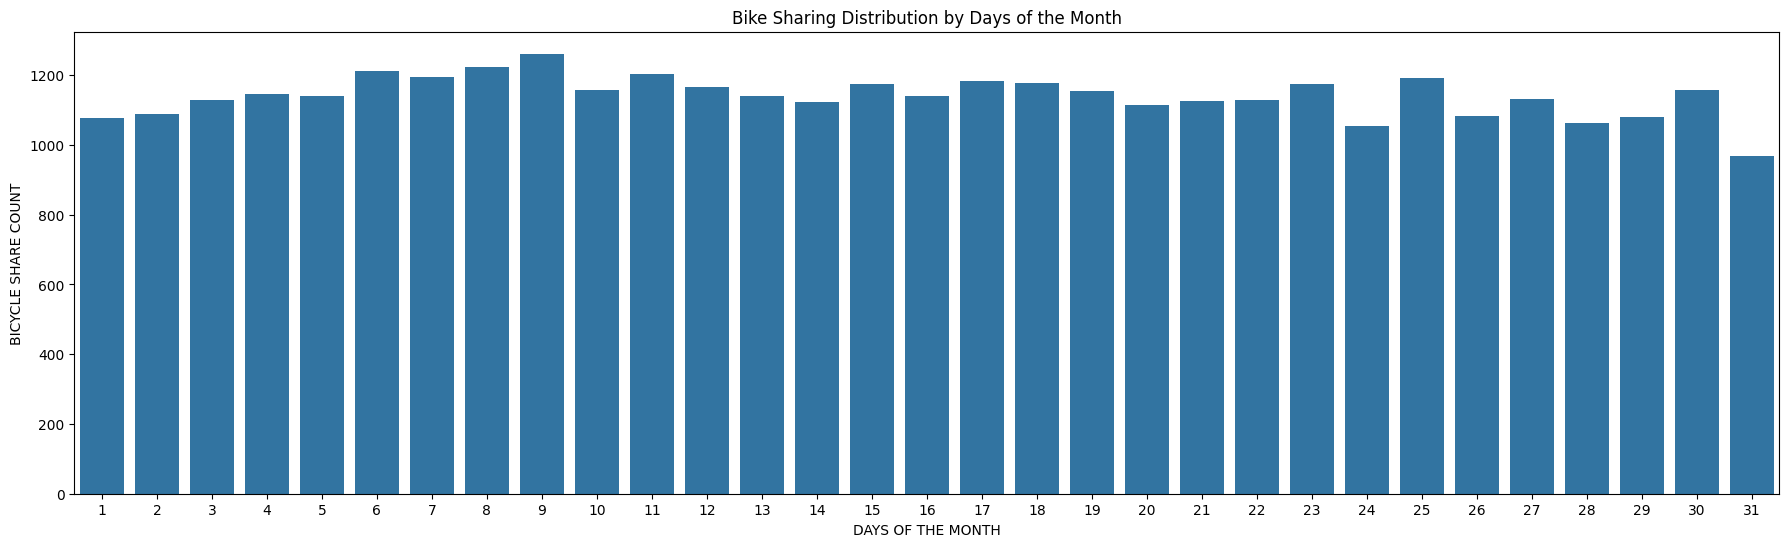

In [43]:
plt.figure(figsize=(22, 6))
plt.xlabel('DAYS OF THE MONTH')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Days of the Month')

sns.barplot(df, x='day_of_the_month', y="cnt", errorbar=None)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

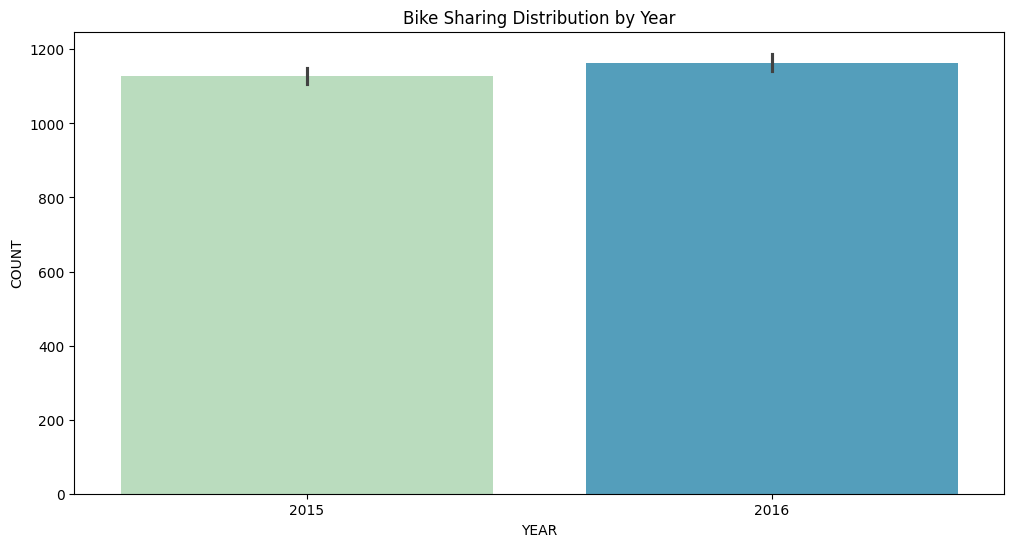

In [45]:
data = df.copy()
plt.figure(figsize=(12, 6))
filtered_df = data[data['year'].isin([2015, 2016])]

sns.barplot(filtered_df, x='year', y='cnt', palette='GnBu')

plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.title('Bike Sharing Distribution by Year')





plt.show()

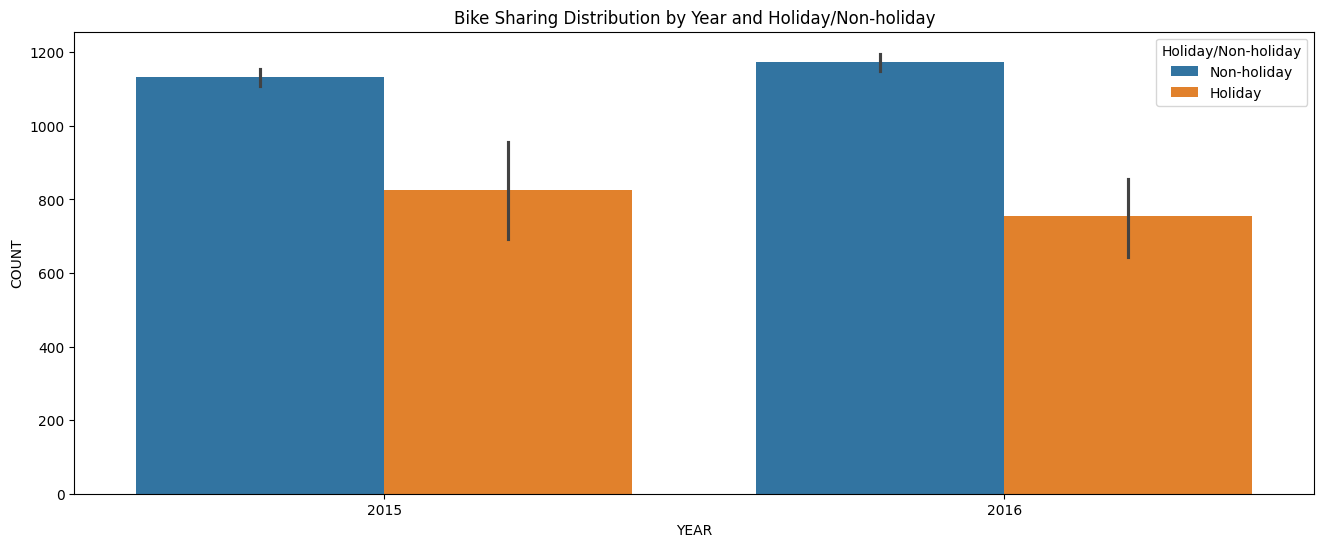

In [46]:
plt.figure(figsize=(16, 6))
data = df.copy()
data['Holiday/Non-holiday'] = df['is_holiday'].map(
    {0: 'Non-holiday', 1: 'Holiday'})
filtered_df = data[df['year'].isin([2015, 2016])]

plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.title('Bike Sharing Distribution by Year and Holiday/Non-holiday')

sns.barplot(filtered_df, x='year', y="cnt", hue='Holiday/Non-holiday')
plt.show()

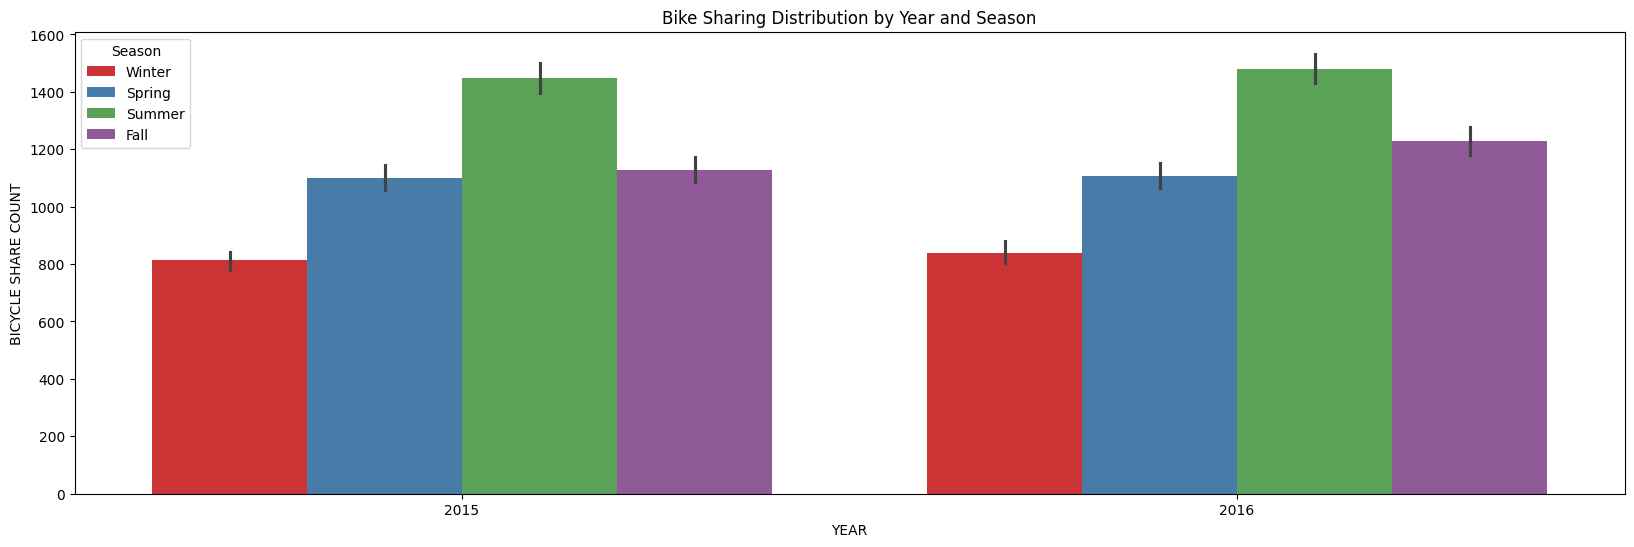

In [47]:
plt.figure(figsize=(20, 6))
data = df.copy()
data['Season'] = df['season'].map(
    {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'})
filtered_df = data[df['year'].isin([2015, 2016])]

plt.xlabel('YEAR')
plt.ylabel('BICYCLE SHARE COUNT')
plt.title('Bike Sharing Distribution by Year and Season')

sns.barplot(filtered_df, x='year', y="cnt", hue='Season', palette='Set1')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

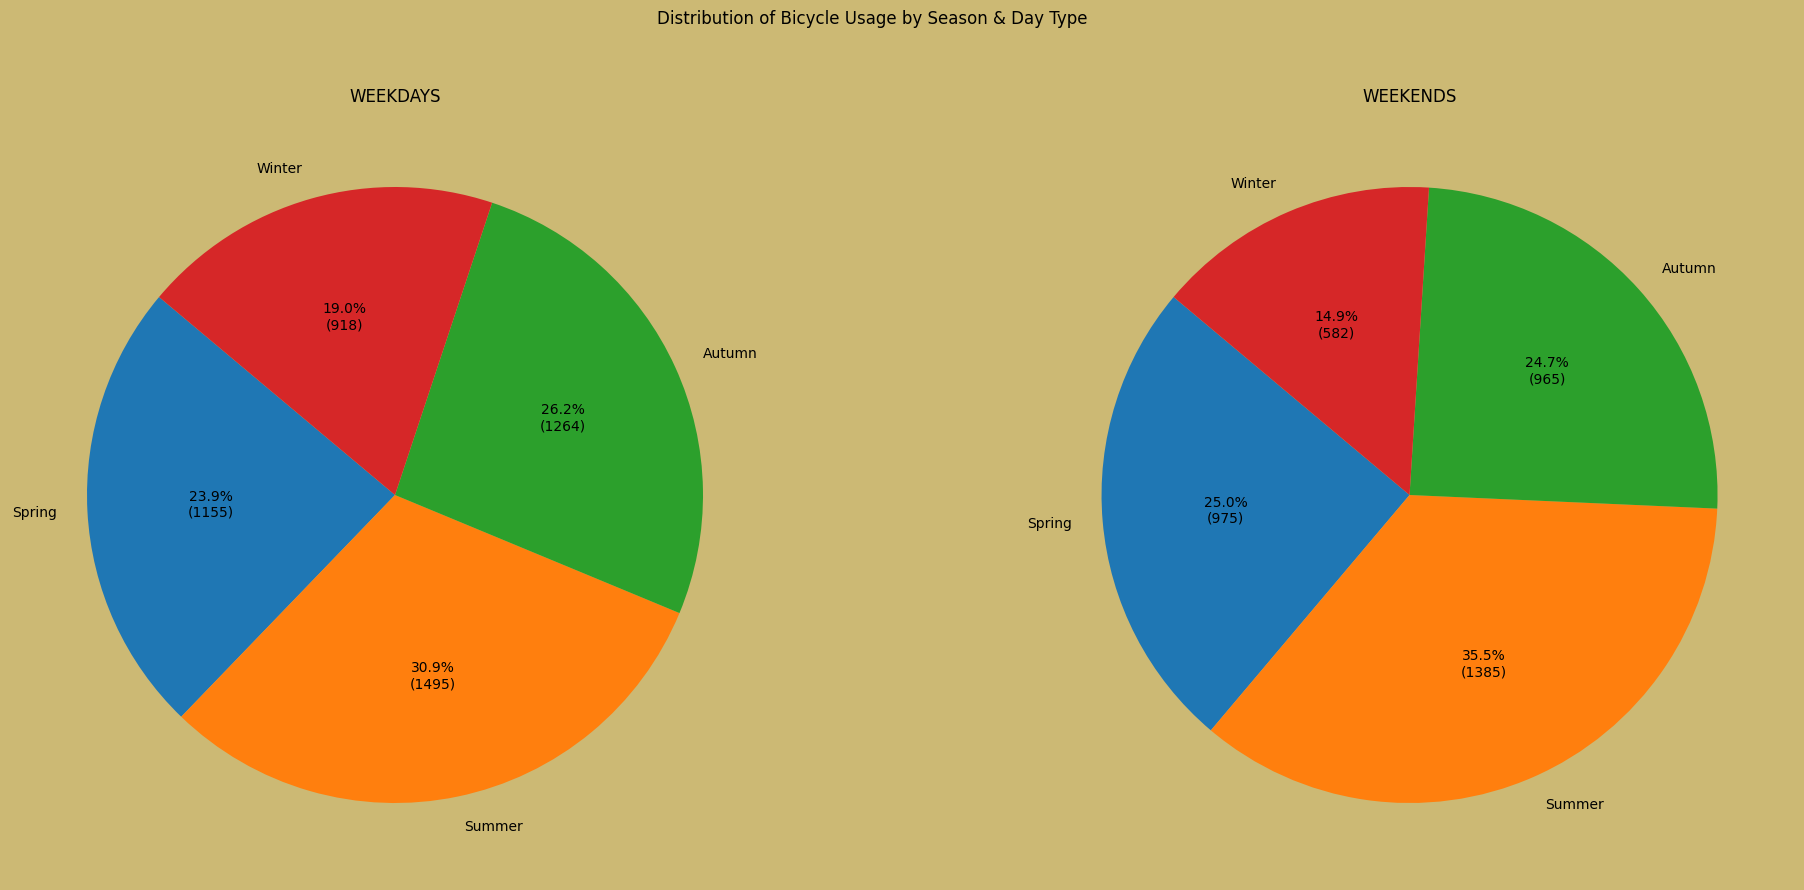

In [48]:
data = df.copy()
weekend_df = data[data['is_weekend'] == 1]
weekday_df = data[data['is_weekend'] == 0]

weekend_grouped = weekend_df.groupby('season')['cnt'].mean().reset_index()

weekday_grouped = weekday_df.groupby('season')['cnt'].mean().reset_index()


season_mapping = {0: "Spring", 1: "Summer", 2: "Autumn", 3: "Winter"}

weekend_grouped['label'] = weekend_grouped['season'].map(
    season_mapping) + ''

weekday_grouped['label'] = weekday_grouped['season'].map(

    season_mapping) + ''


def func(pct, allvalues):

    absolute = int(pct/100.*sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, axs = plt.subplots(1, 2, figsize=(24, 10))

plt.suptitle('Distribution of Bicycle Usage by Season & Day Type')

axs[1].pie(weekend_grouped['cnt'], labels=weekend_grouped['label'],
           autopct=lambda pct: func(pct, weekend_grouped['cnt']), startangle=140)

axs[1].set_title('WEEKENDS')

axs[0].pie(weekday_grouped['cnt'], labels=weekday_grouped['label'],
           autopct=lambda pct: func(pct, weekday_grouped['cnt']), startangle=140)
axs[0].set_title('WEEKDAYS')

fig.patch.set_facecolor('#ccb974')


plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

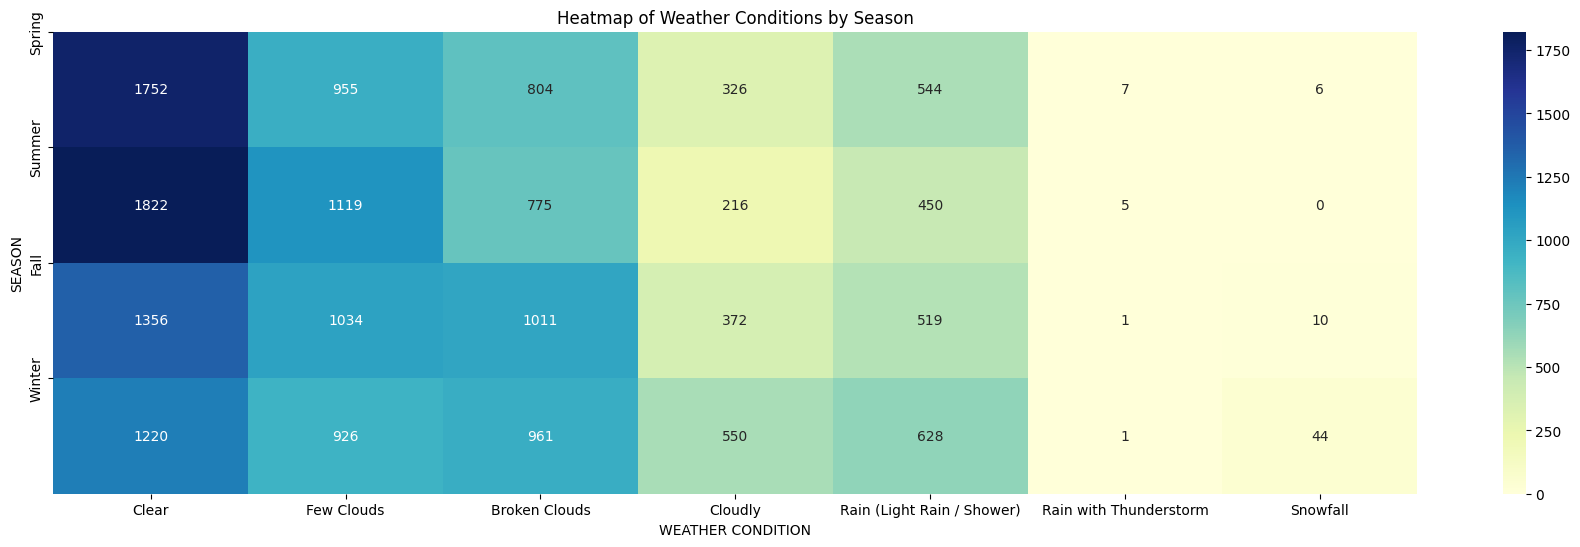

In [49]:
data = df.copy()
weather_season_crosstab = pd.crosstab(data['season'], data['weather_code'])

plt.figure(figsize=(22, 6))
sns.heatmap(weather_season_crosstab, annot=True, cmap='YlGnBu', fmt='d')
season_labels = ["Spring", "Summer", "Fall", "Winter"]
plt.yticks(ticks=[0, 1, 2, 3], labels=season_labels)

weather_labels = {0: "Clear",
                  1: "Few Clouds", 2: "Broken Clouds", 3: "Cloudly", 4: "Rain (Light Rain / Shower)",
                  5: "Rain with Thunderstorm", 6: "Snowfall", 7: "Freezing Fog"
                  }

new_labels = [weather_labels.get(label, label) for label in current_labels]
plt.gca().set_xticklabels(new_labels)

plt.xlabel('WEATHER CONDITION')
plt.ylabel('SEASON')
plt.title('Heatmap of Weather Conditions by Season')
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions

Conclusion & Insight






    

    

</span>

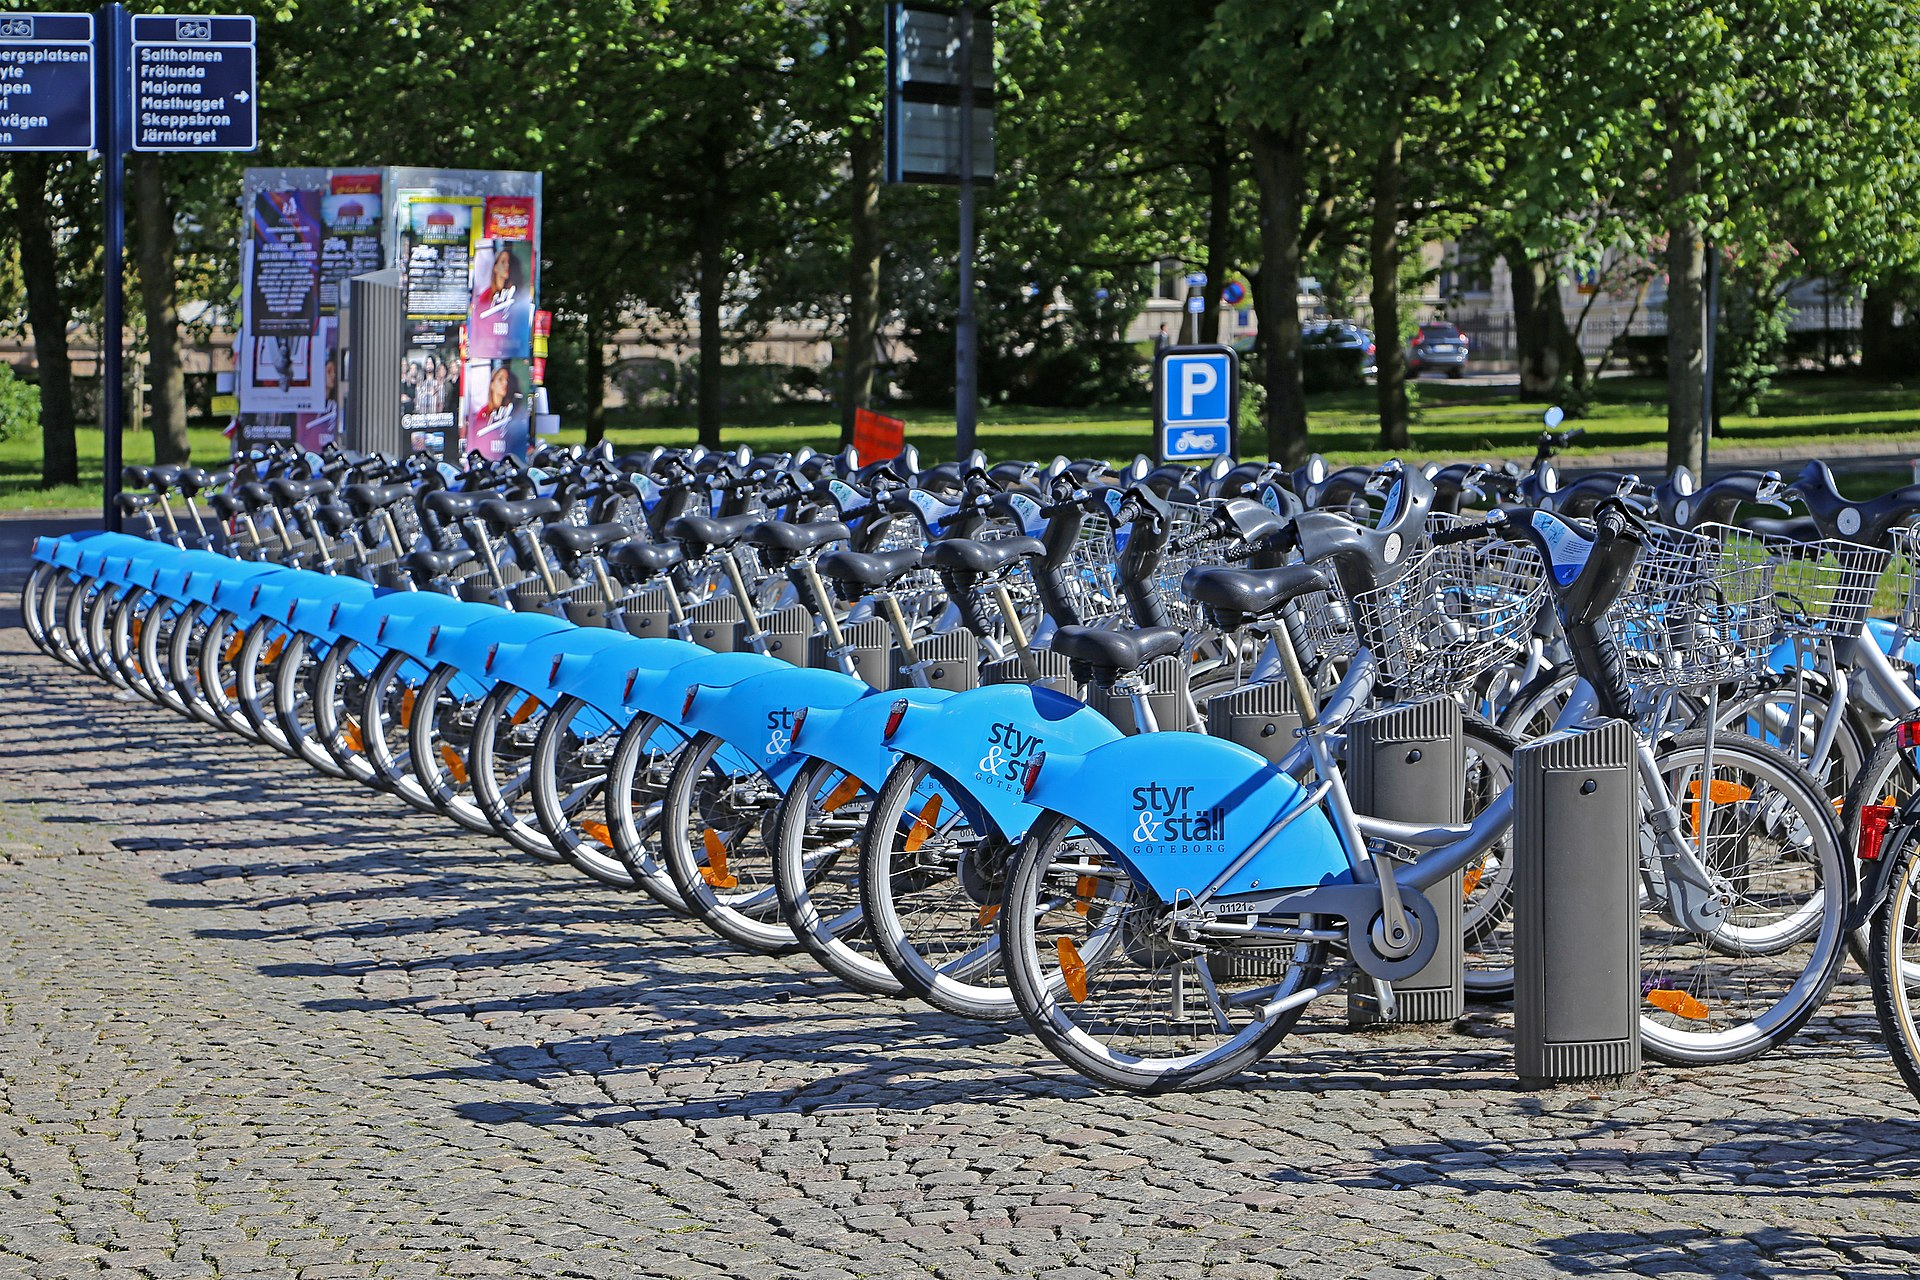



- **Weekday and Non-Holiday Preference:** The data distinctly illustrates higher demand on weekdays and non-holiday days compared to weekends and holidays.

- **Weather Influence:** The analysis underscores a preference for bicycle rentals on days characterized by "clear" weather, followed by "scattered clouds" and "broken clouds". Interestingly, demand remains higher on "rainy" days compared to "cloudy" ones, with negligible activity observed during snowy and stormy conditions.


- **Weekend and Holiday Trends:** Consistently, bicycle rentals exhibit a decline during weekends and holidays, aligning with leisurely activities.

- **Seasonal Variations:** Bicycle rental rates experience a slight dip during winter and autumn, while witnessing a surge during spring and summer, reflecting seasonal preferences.

- **Friday Trends:** Notably, demand registers a decline on Fridays, possibly indicating altered commuting patterns towards the end of the week.

- **Correlation Analysis:** Correlations unveil a strong positive relationship between air temperature and bicycle rentals, alongside negative correlations between temperature and humidity, and wind speed and humidity.

- **Temperature Impact:** The study observes a positive correlation between air temperature and bicycle rentals, with demand escalating notably during the temperature range 25-30 degrees Celsius.

- **Wind Speed Dynamics:** An inverse relationship emerges between wind speed and bicycle rentals, with demand tapering off as wind speeds exceed 26 km/h, indicating a threshold for consumer comfort.

- **Seasonal Trends:** Demand follows a discernible pattern, peaking in July and tapering off post-October, with the lowest levels witnessed between December and March. In essence, weekday rentals during non-holiday periods, particularly in the warmer months, constitute the peak periods, underscoring the need for bicycle rental companies to tailor their services accordingly.




#### Integration of Weather Forecasting:
Utilizing daily weather forecasts and historical data to predict future bicycle usage is vital to increase the amount of bicycles shared. These predictions can be instrumental in effectively managing resources. For instance, reducing the number of available bicycles on rainy days, or increasing availability on sunny days.

#### Advertising and Marketing Strategies: 
It is highly advisable to tailor special discounts, promotions, or events based on weather conditions to incentivize users. For example, offering discounts on rain gear during rainy days or free bike rentals on rainy days.

#### Infrastructure and Service Planning: 
It is also of great importance to ensure appropriate infrastructure and service planning based on weather conditions. Measures like clearing bike paths on snowy days or providing more shaded areas on hot days can be implemented.

#### Customer Feedback and Surveys: 
Utilizing customer feedback and surveys to better understand user tendencies in specific weather conditions is critical for a more predictable business growth. This can provide valuable insights for adapting and improving the service.

#### Flexible Pricing Policies: 
Adjusting bicycle rental fees flexibly based on weather conditions may help prevent fluctuations between seasons and weather conditions. For instance, lower prices on rainy days or higher prices on sunny days can be arranged.